# Trade&Ahead

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.




## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [ ]:
# mounting google drive for loading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
path="/content/drive/MyDrive/tradeahead/stock_data .csv"
data= pd.read_csv(path)

In [ ]:
#copying the data
df=data.copy()

## Data Overview

In [ ]:
#Shape of the data
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 340 rows and 15 columns in the dataset


In [ ]:
# Checking columns and data types in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations:
- There are 15 columns.
- 4 are of object types.
- 7 are of floating point type.
- 4 are of integer type.


In [ ]:
# Let's look at some random sample data
df.sample(n=10, random_state=1)


,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


#### Observations:
- From the above sample data we do not see any missing values. Let us investigate it further.

#### Let us check for duplicate values

In [ ]:
# checking duplicate values in the data
df.duplicated().value_counts()

False    340
dtype: int64

#### Observations:
- There are no duplicate values.


#### Let us check for missing values

In [ ]:
# Checking for missing values in the data
df.isnull().any()

Ticker Symbol                   False
Company                         False
GICS Sector                     False
GICS Sub Industry               False
Current Price                   False
Price Change                    False
Volatility                      False
ROE                             False
Cash Ratio                      False
Net Cash Flow                   False
Net Income                      False
Earnings Per Share              False
Estimated Shares Outstanding    False
P/E Ratio                       False
P/B Ratio                       False
dtype: bool

#### There are no missing values in the data.

#EDA

In [ ]:
# summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


#### Observations:
- Mean current price of stocks is 80.86$. By looking at the minimum and maximum current price we can say that there is a wide range of values for current price.

- Mean Price change is ~4%. It also ranges from -47.12 to 55.05

- Mean Volatality is 1.5$.

- Mean ROE is 39.59%

- Mean Cash Ratio is 70%.

- Mean Net Cash flow is 55537620.0$. It has wide range of values.

- Mean Net income is 1494385000.0$, also has wide range.

- Mean Earnings per share is 2.77$

- Mean Estimated Shares Outstanding is 577028300$

- Mean P/E ratio is 3.26

- Mean P/B ratio is -1.71

In [ ]:
# summary of the non-numeric data
df.describe(include='object').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Company,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


#### Observations:
- Everey company has its own unique ticker symbol.

- There are 11 unique sectors.

- 104 Sub industries.

- Industrials sector is the top sector, 53 of the companies in the data belongs to this sector.

- Oil and Gas Exploration & Production is the top sub-sector by having 16 companies belonging to this sector.


### Univariate analys

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

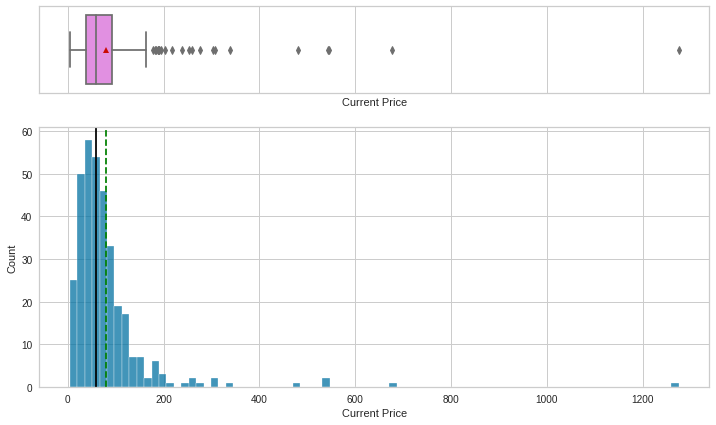

In [ ]:
#Histogram boxplot for Current price
histogram_boxplot(df, 'Current Price')

#### Observations:
- Mean Current price is 80.86$.

- Median Curren price is 50.7$

- Distribution of Current price is skewed to the right.

- Minimum Current price is 4.5$.

-  Maximum is ~1275$

- There are also lots of outliers to the right.

- There is one stock with current price more than 1200\$ which is farthest outlier.


**`Price Change`**

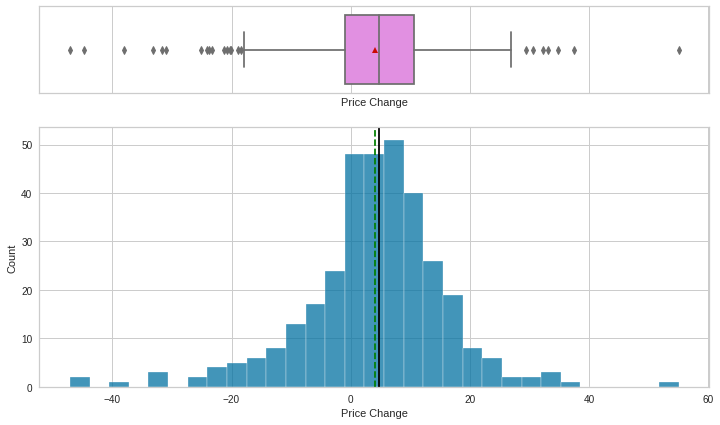

In [ ]:
#Histogram boxplot for Price Change
histogram_boxplot(df,'Price Change')

#### Observations:
- Price Change looks almost normally distributed.

- Mean and Median are almost same.

- It has outliers at both ends.

**`Volatility`**

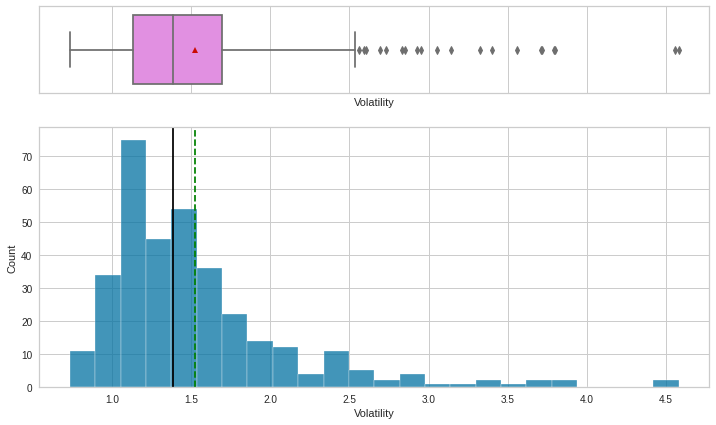

In [ ]:
#Histogram boxplot for Volatility
histogram_boxplot(df,'Volatility')

#### Observations:

- Distribution is right skewed.

- Mean Volatality is around 1.52. Median is 1.38.

- There are outliers to the right, indicating some stocks are more volatile than average.

**`ROE`**

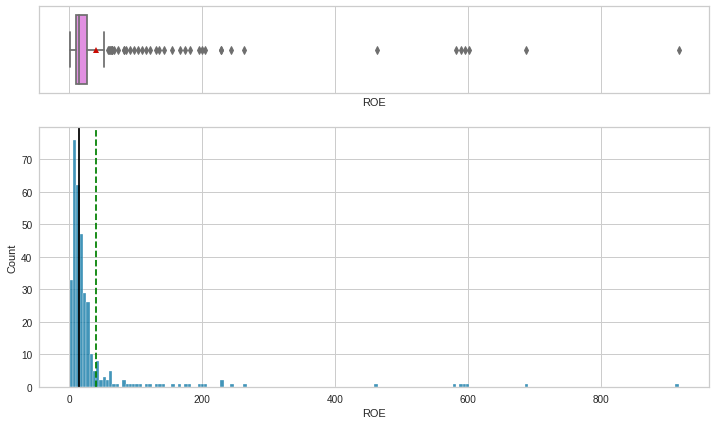

In [ ]:
#Histogram boxplot for ROE
histogram_boxplot(df,'ROE')

#### Observations:
- Distribution of ROE is right skewed.

- There are large outliers to the right, indicating there are many companies being effective at generating profit from its existing assets.

- Maximum of ROE is 917%

**`Cash Ratio`**

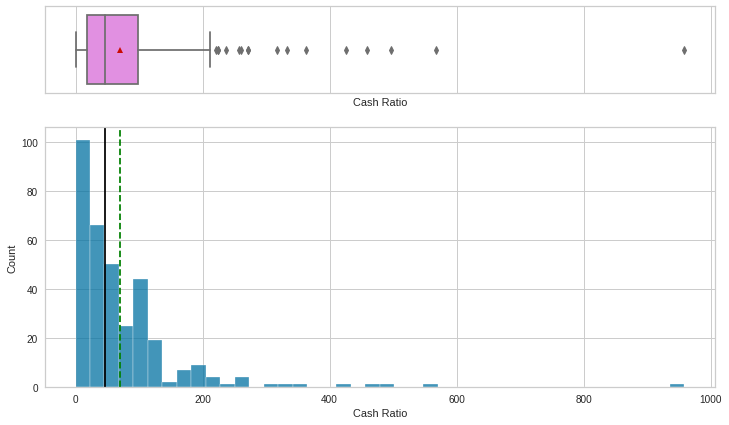

In [ ]:
##Histogram boxplot for Cash Ratio
histogram_boxplot(df,'Cash Ratio')

#### Observations:

- Cash ratio is right skewed.

- There are outliers to the right, indicating there are companies with very good liquidity. Compared to others.

- Maximum of cash flow of a company in the data is 958%

**`Net Cash Flow`**

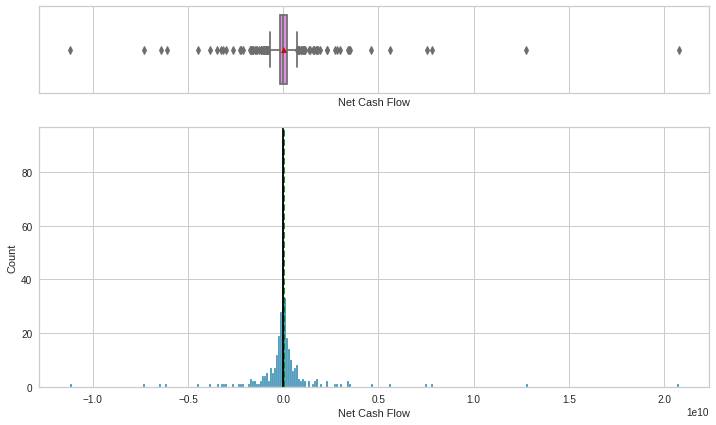

In [ ]:
#Histogram boxplot for Net Cash Flow
histogram_boxplot(df,'Net Cash Flow')

#### Observations:
- Histogram boxplot for Net Cash flow is shown in exponential form since they are very large numbers.
- In this Exponential form  Net cash flow looks almost normally distributed.
- It has outliers at both ends.
- Mean Net cash flow is 55537620.58$

**`Net Income`**

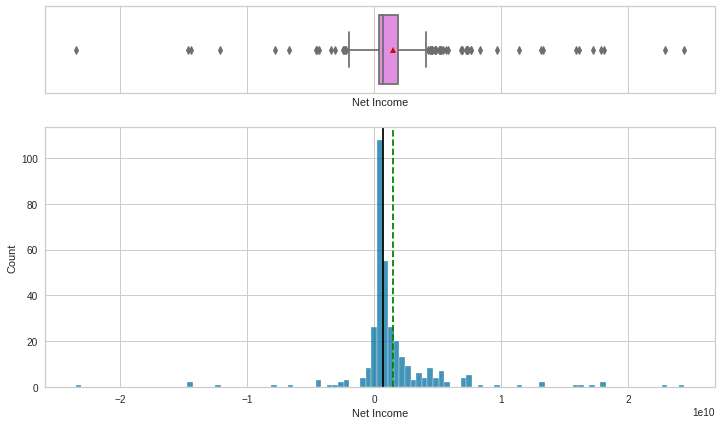

In [ ]:
#Histogram boxplot for Net Income
histogram_boxplot(df,'Net Income')

#### Observations
- Histogram boxplot is plotted in exponential form of the values.

- Distribution of Net Income looks right skewed.

- It has outliers at both ends.

- Minimum net income is 23528000000$

- Maximum of net income is 24442000000$

**`Earnings Per Share`**

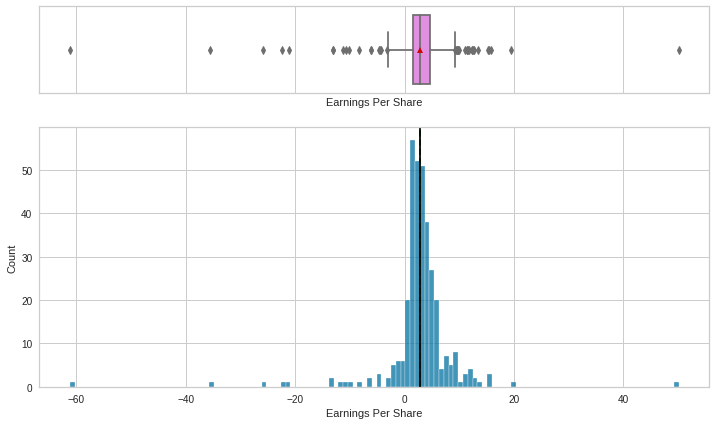

In [ ]:
#Histogram boxplot for Earnings per share
histogram_boxplot(df,'Earnings Per Share')

#### Observations:
- Mean and Median Earnings per share is almost same.
- Distribution looks almost normally distributed.
- It has outliers at both ends, Indicating Earnings per share is very good for some companies and negative for others.


**`Estimated Shares Outstanding`**

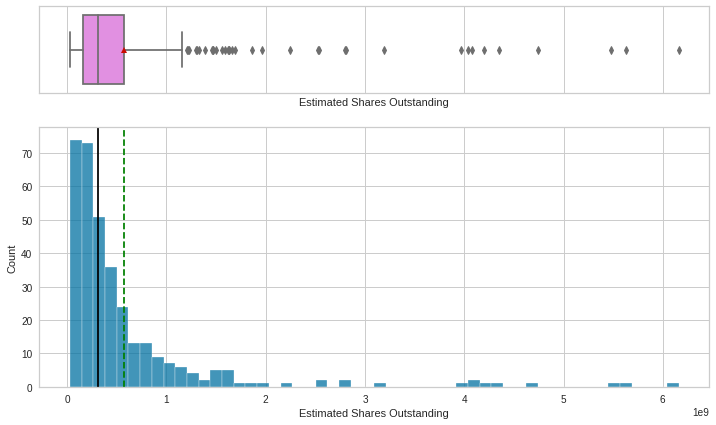

In [ ]:
# Histogram boxplot for Estimated Shares Outstanding
histogram_boxplot(df,'Estimated Shares Outstanding')

#### Observations:
- Plot is in the exponential form for values.
- Distribution is right skewed.
- It has lots of outliers to the right.
- Maximum estimated shares outstanding by a company is 615929203 shares
- Minimum estimated shares outstanding by a company is 27672156 shares

**`P/E Ratio`**

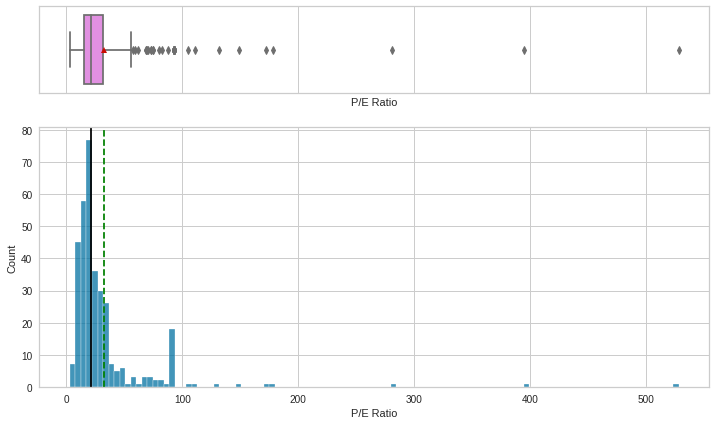

In [ ]:
#Histogram boxplot for P/E ratio
histogram_boxplot(df, 'P/E Ratio')

#### Observations:
- Distribution of P/E ratio is right skewed.
- There are outliers to the right.
- Minimum P/E ratio is 2.93.
- Maximum P/E ratio is ~528.

**`P/B Ratio`**

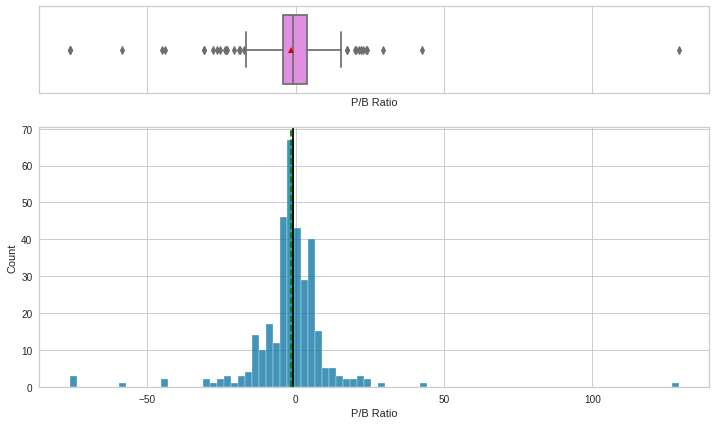

In [ ]:
#histogram boxplot for P/B ratio
histogram_boxplot(df,'P/B Ratio')

#### Observations:
- Distribution of P/B ratio looks almost normally distributed.
- It has outliers at both ends.
- Both mean and median values rae negative.
- Minimum value is ~-76, maximum is ~129

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

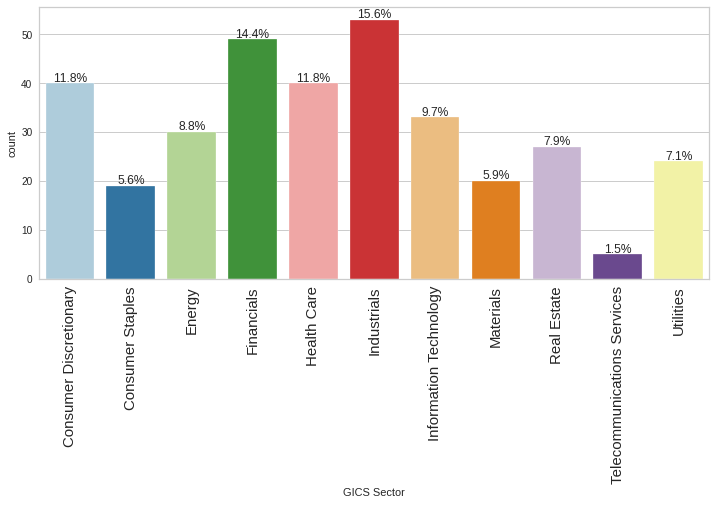

In [ ]:
#labeled barplot for GICS Sectors
labeled_barplot(df, 'GICS Sector', perc=True)

#### Observations:
- There are 11 unique GICS assigned economic Sectors
- Industrials, Financials,Healthcare, Consumer Dicretionary are the top 4 sectors.
- Telecommunication Services is only 1.5% of the total services.

**`GICS Sub Industry`**

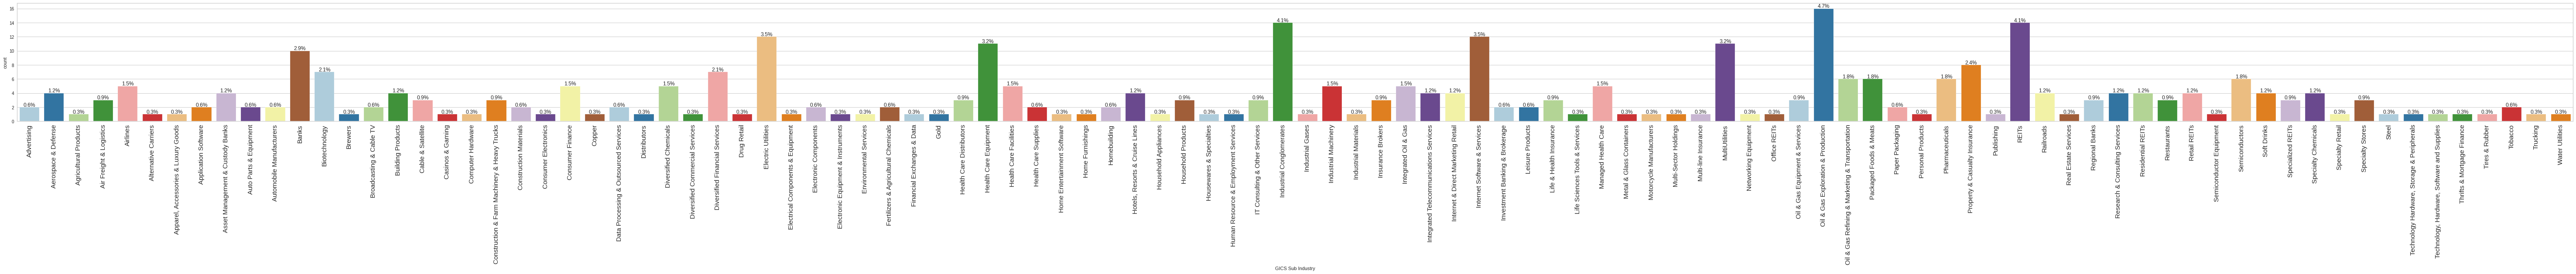

In [ ]:
# Labeled barplot for GICS sub industries
labeled_barplot(df, 'GICS Sub Industry', perc=True)

**Since the barplot is very wide, for visualization purpose we can crop the image and visualize it as below**

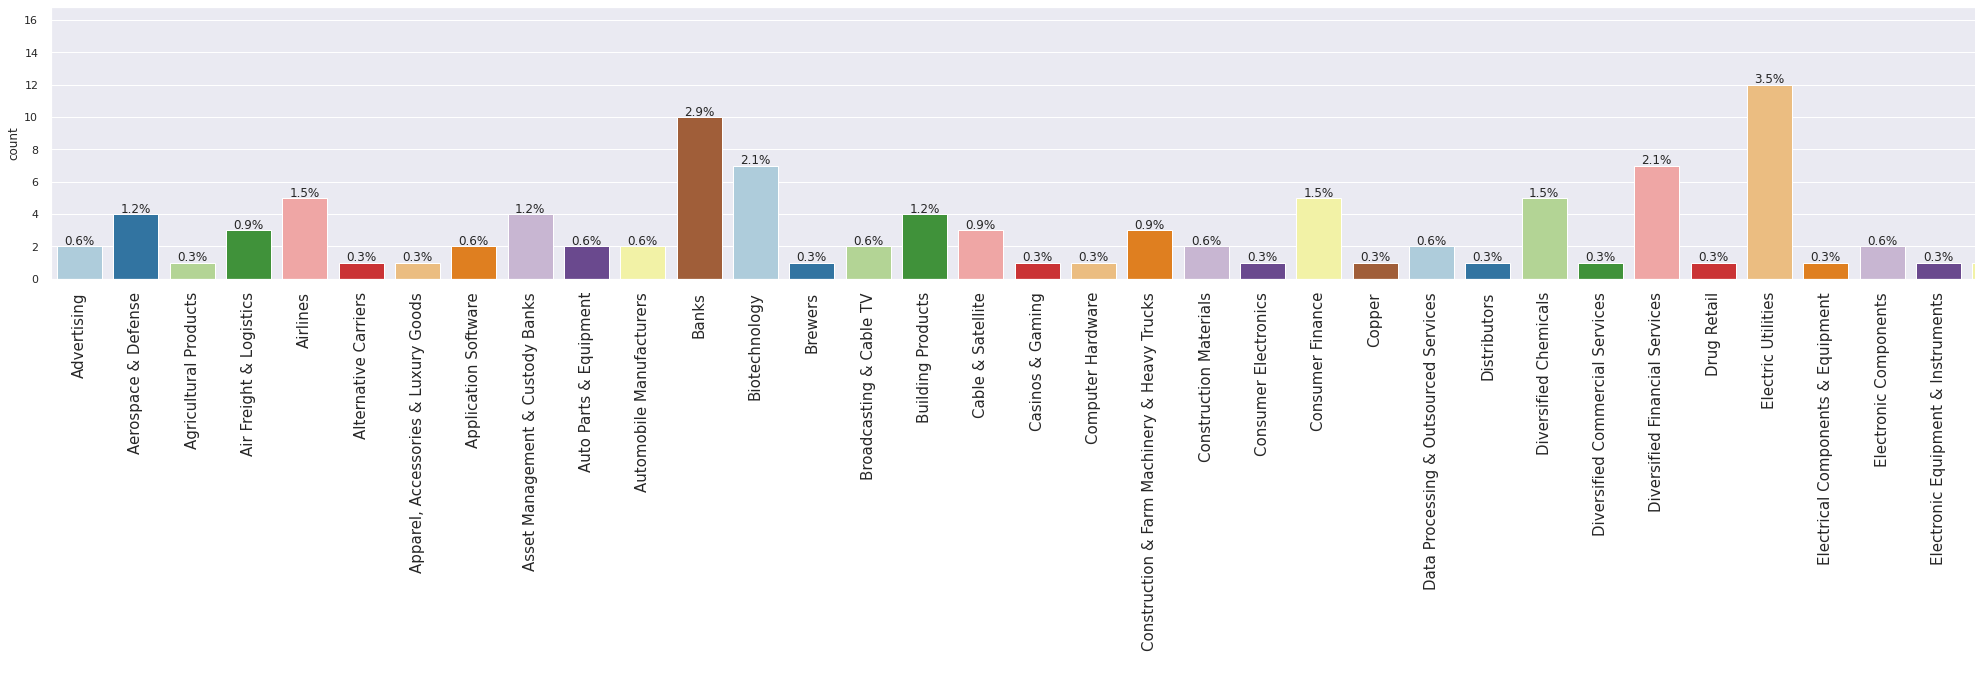

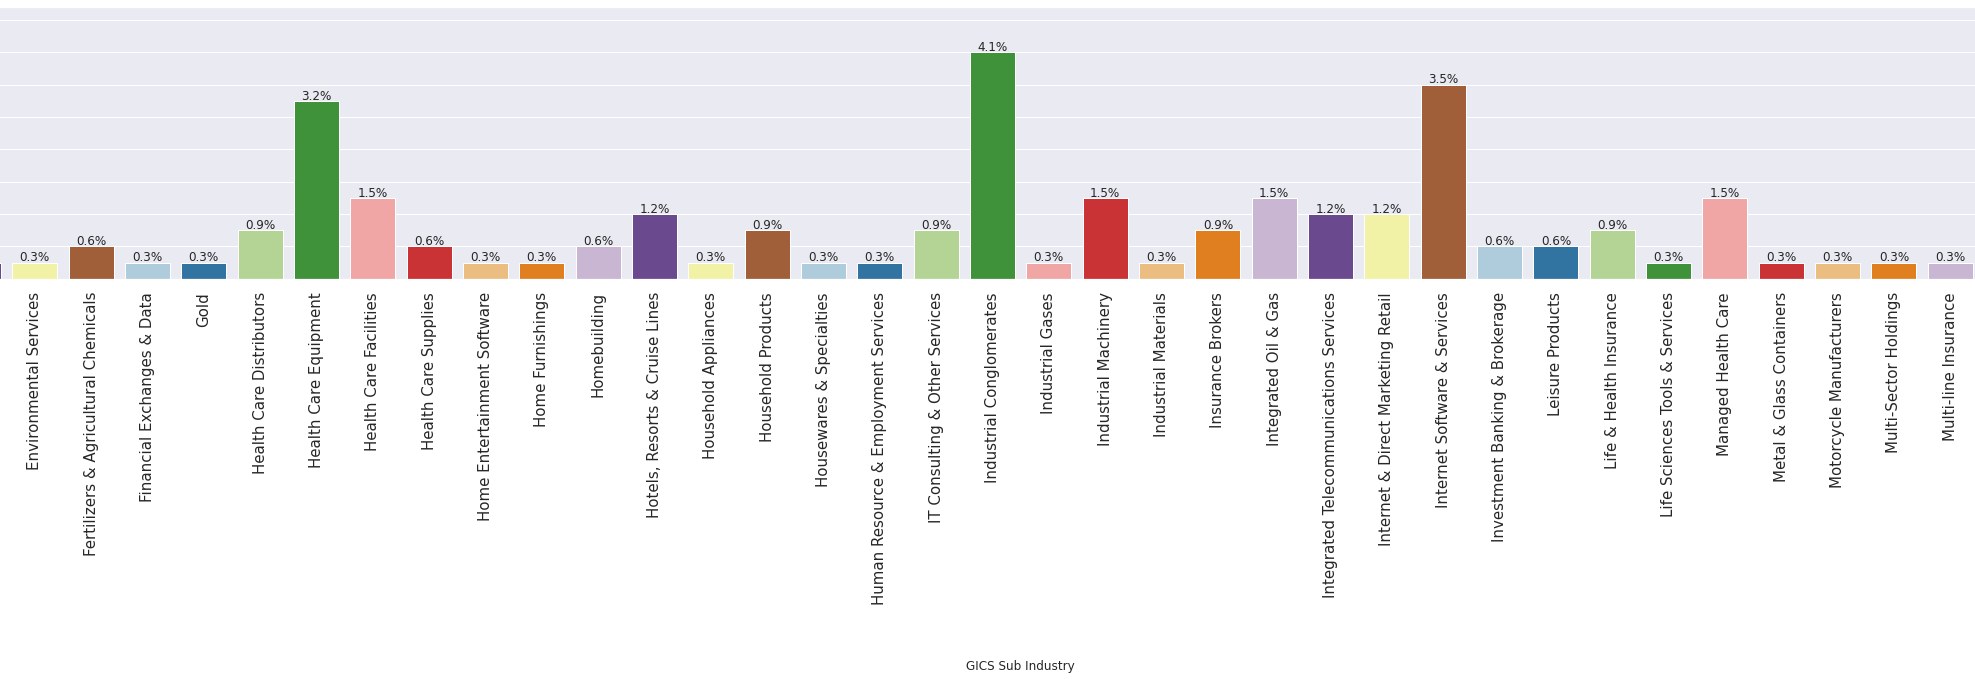

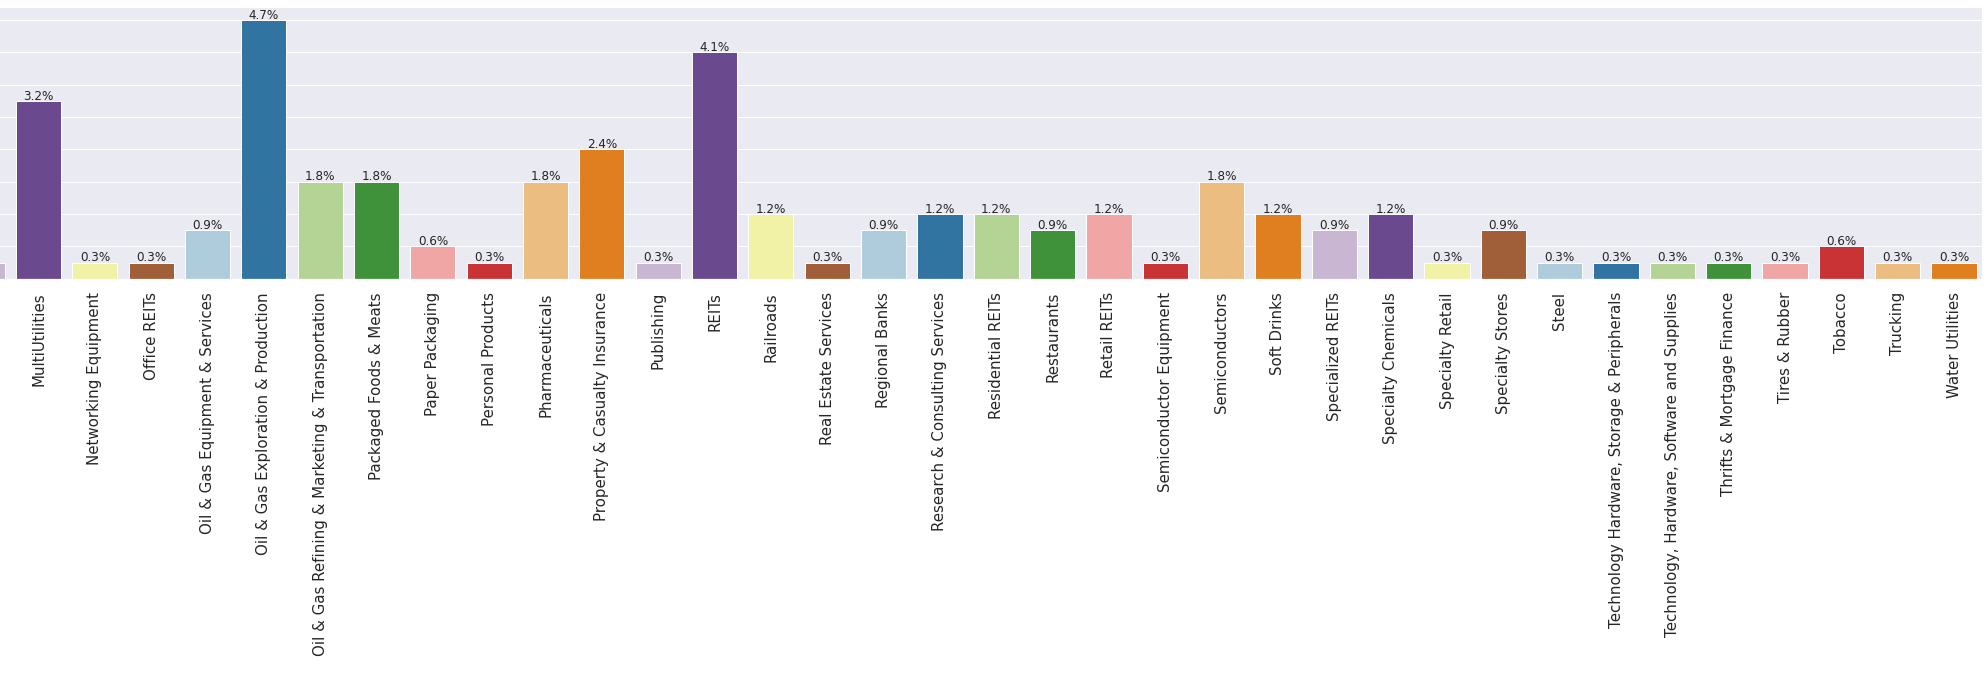

#### Observations:
- There are 104 Sub Industires.
- Oil and gas Exploration and production, RETs,Industrial Conglomerates are the top 3 sub industries.

## Bivariate Analysis

#### Let us see correlation between variables

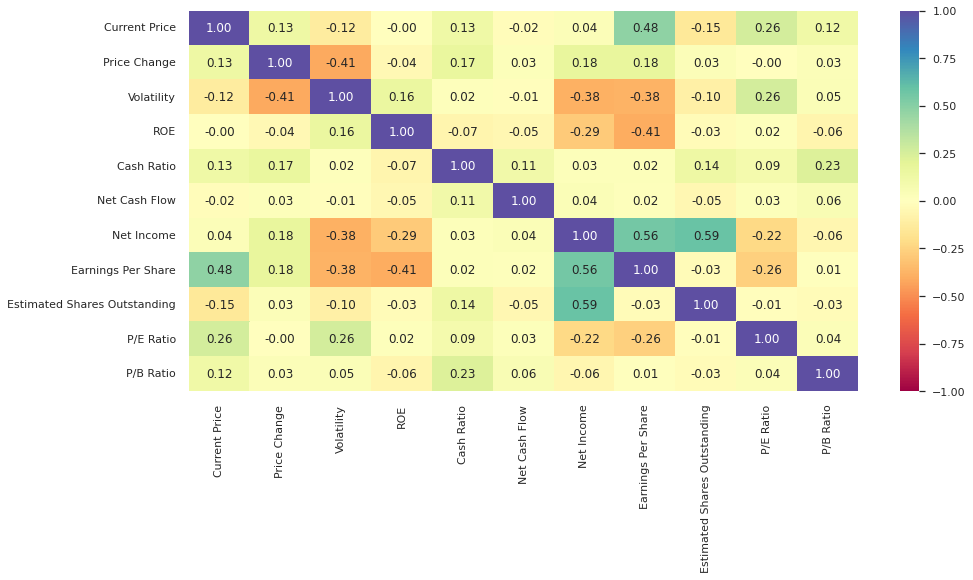

In [ ]:
# Checking correlation among numeric variables
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- None of the varibales are strongly correlated to each other.
- Net Income is somewhat positively correlated with Estimated shares outstanding and Earnings per share.

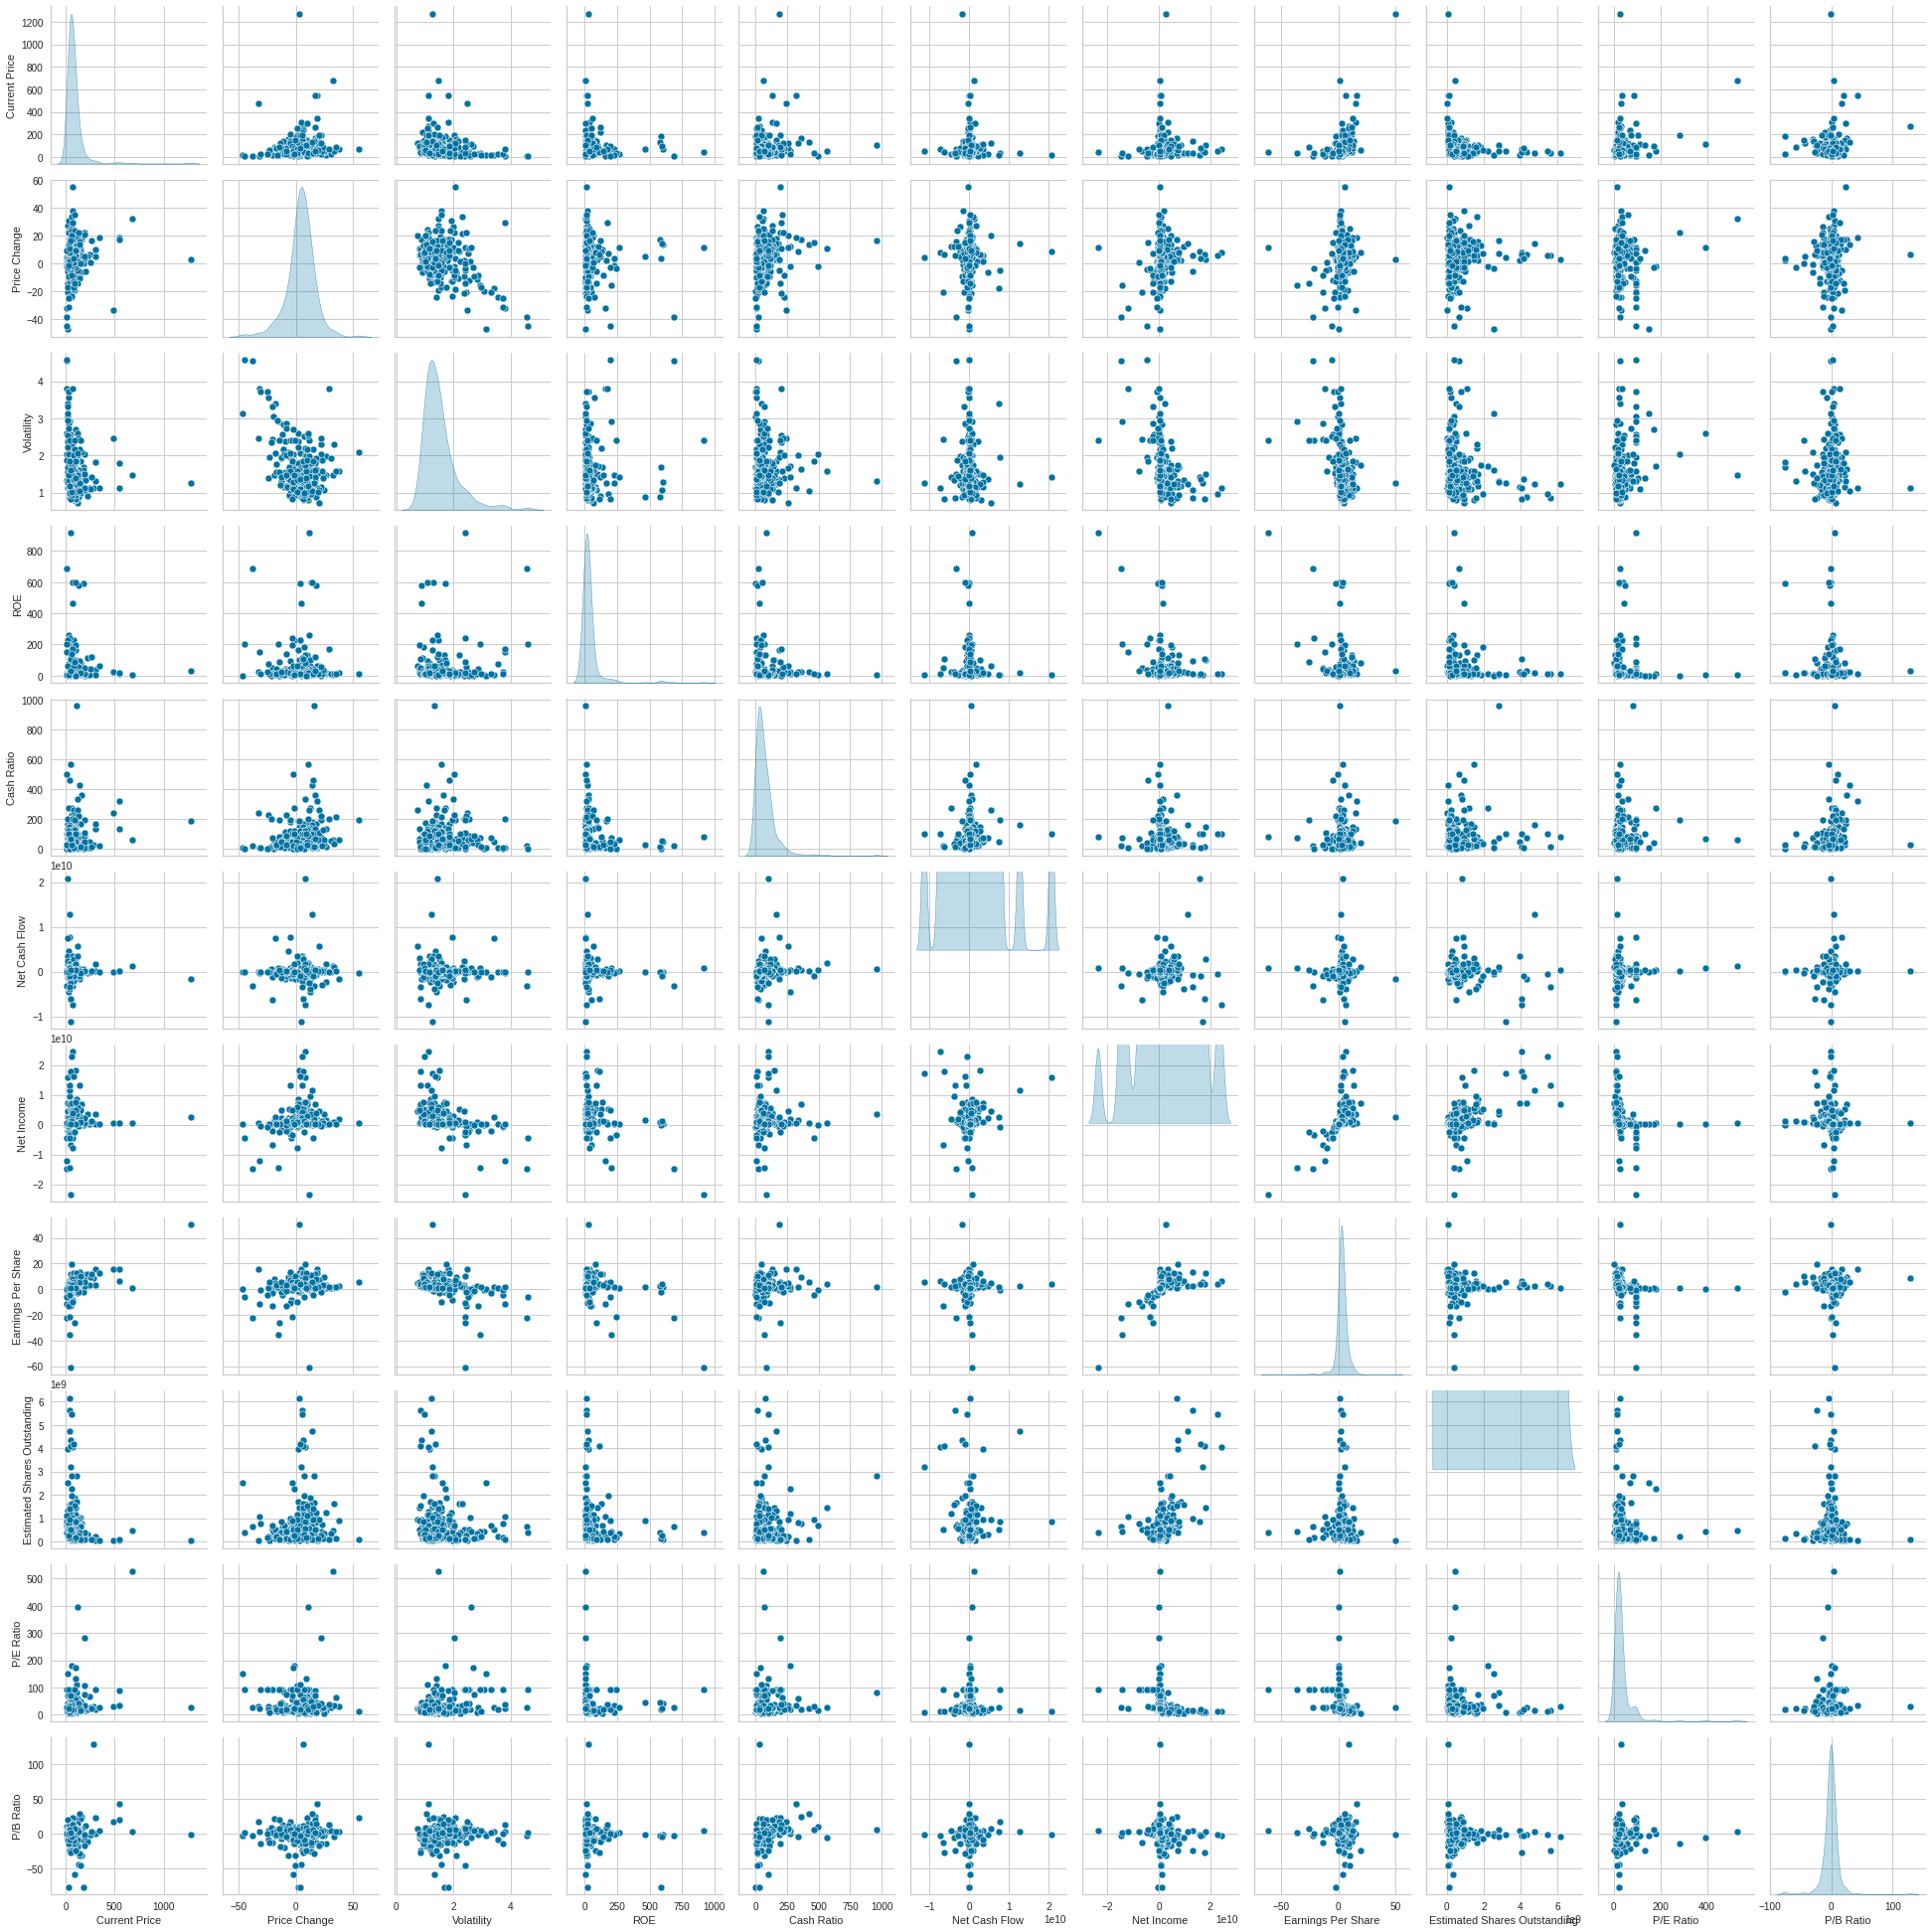

In [ ]:
#Pairplot for numeric vaiables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()


#### Observations:
- Some of the variables appear to be almost normally distributed.
- Some are right skewed.
- Some are multimodal.

**Let us see distribution of stock prices along different sectors**

In [ ]:
# Average Current Price of stocks along different sectors
df['Current Price'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         128.095404
Consumer Staples                71.972807
Energy                          46.042334
Financials                      58.659183
Health Care                    132.048250
Industrials                     74.411807
Information Technology          63.548485
Materials                       76.551501
Real Estate                     90.976925
Telecommunications Services     32.964000
Utilities                       52.968542
Name: Current Price, dtype: float64

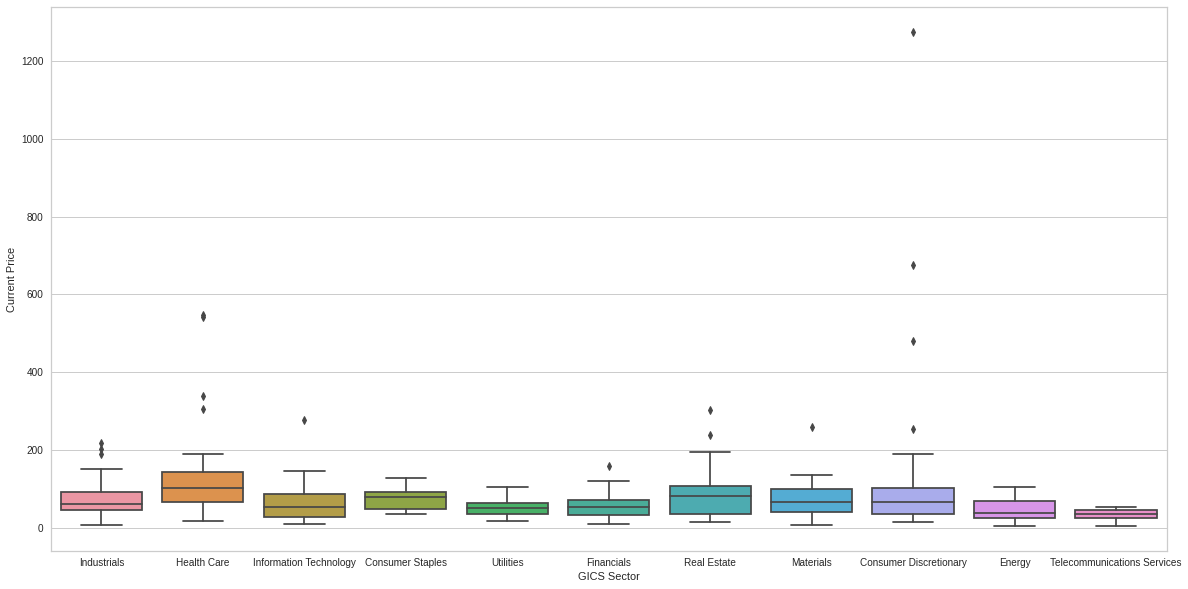

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['GICS Sector'], y=df['Current Price'], data=df)

#### Observations:
- Distribution of current price of the stock looks right skewed along different sectors.
- Consumer directory, Real estate sectors have wide range of values and has outliers. Highest price for a stock belongs to Consumer directory sector.
- Telecommunications and utilities have low range of values.
- Health care sector's stocks look like almost normally distributed and also has outliers.
- Most of the sectors have outliers to the right
- Consumer Discretionary has a stock above 1200\$ which is the maximum stock price in our data


**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

In [ ]:
# Average Price change among sectors
df['Price Change'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

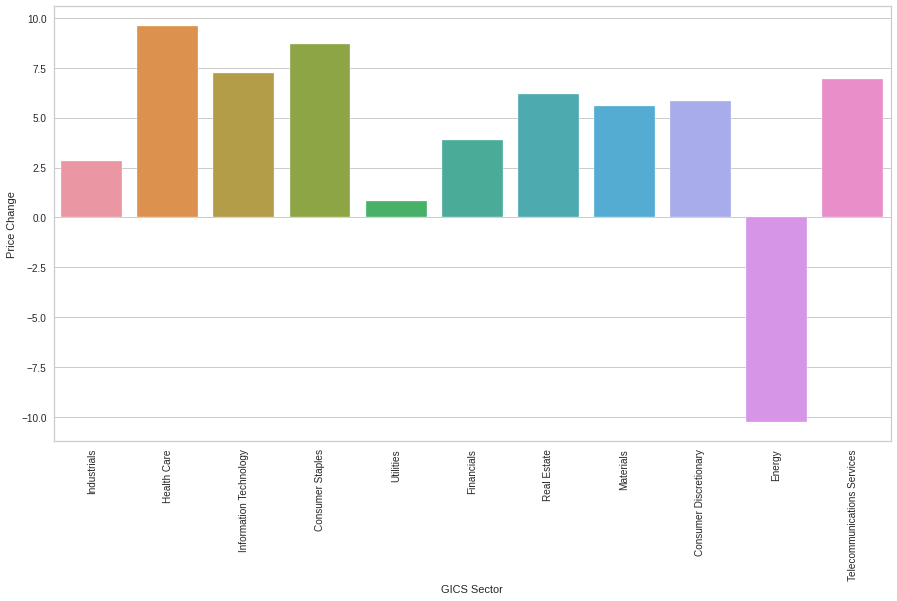

In [ ]:
# Barplot for average price change among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Health care sector have seen the maximum price increase on average.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

In [ ]:
# Average Cash Ratio among sectors
df['Cash Ratio'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

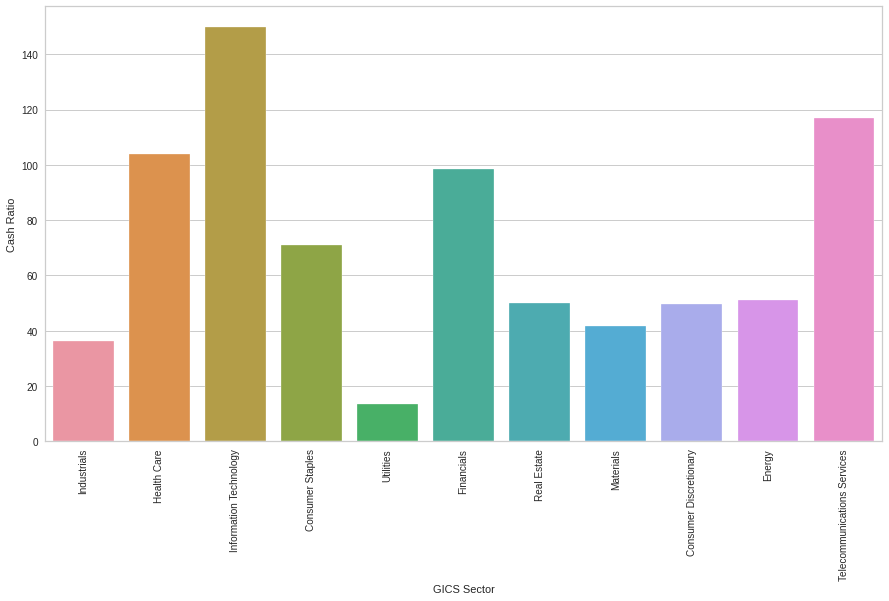

In [ ]:
# Barplot for average Cash ratio among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Average Cash ratio of Information Technology is 140, which the highest among all sectors.
- Telecommunications Services and health care sectors also have average cash ratio which is above 100.
- Utilities sector have lower end of cash ratio among different sectors.
- Real Estate, Consumer Discretionary and energy have almost similar cash ratio.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

In [ ]:
# Average Volatality among sectors
df['Volatility'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         1.595478
Consumer Staples               1.152675
Energy                         2.568777
Financials                     1.267255
Health Care                    1.541023
Industrials                    1.416989
Information Technology         1.659801
Materials                      1.816726
Real Estate                    1.206053
Telecommunications Services    1.341612
Utilities                      1.118018
Name: Volatility, dtype: float64

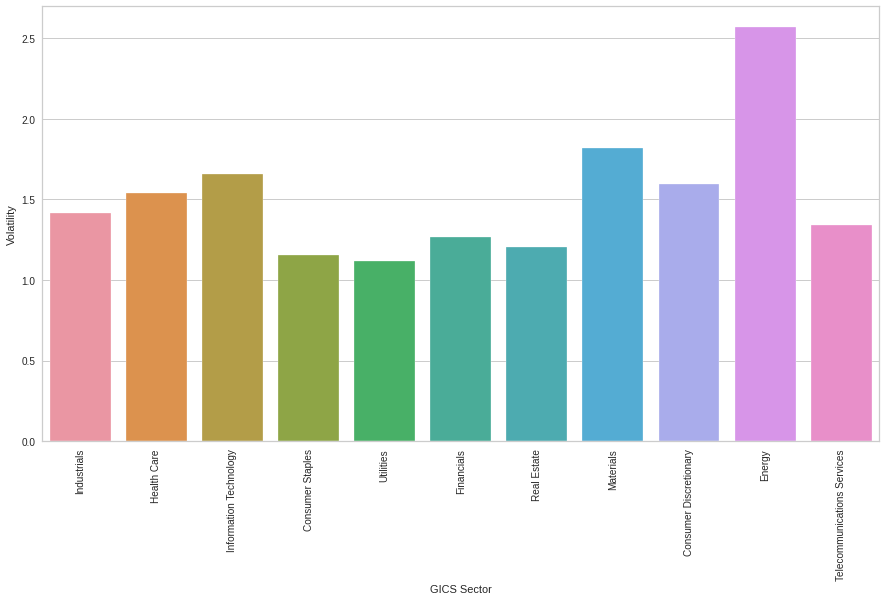

In [ ]:
# Barplot for average volatility among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Average volatility ranges from 1.1 to 2.5
- Energy sector shows maximum average volatility.
- Materials and Information Technology sectors have next maximum volatile sectors on average.
- Utilities sector shows minimum average volatility among all sectors.

**ROE is a measure of financial performance calculated by dividing a company's net income by its shareholders' equity, thereby arriving at a measure of how efficient a company is in generating profits. The higher a company's ROE percentage, the better. Let us see how ROE varies on avergae across different sectors.**

In [ ]:
# Average ROE among sectors
df['ROE'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         44.900000
Consumer Staples               89.421053
Energy                         93.200000
Financials                     26.285714
Health Care                    27.775000
Industrials                    50.150943
Information Technology         21.787879
Materials                      33.000000
Real Estate                    12.444444
Telecommunications Services    32.600000
Utilities                       9.875000
Name: ROE, dtype: float64

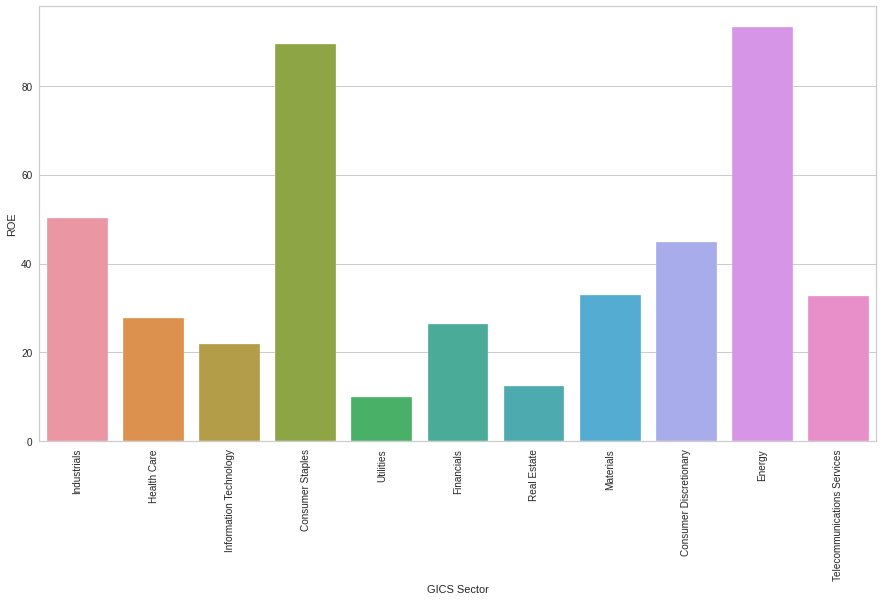

In [ ]:
# Barplot for average ROE among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='ROE', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Energy and Consumer staples are top 2 sectors with maximum ROE of ~93% and ~89% respectively.
- Utilities sector has minimum ROE of 9.87%.


**The net cash flow is the difference between a company's cash inflows and outflows. Let us see how a net cash flow varies on average, across different sectors.**

In [ ]:
# Average Net Cashflow among sectors
df['Net Cash Flow'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         8.421318e+07
Consumer Staples               2.586272e+08
Energy                        -3.083182e+08
Financials                     2.543563e+08
Health Care                    2.626878e+08
Industrials                   -1.601032e+08
Information Technology         4.830991e+08
Materials                     -2.912368e+08
Real Estate                    3.546704e+06
Telecommunications Services   -1.816800e+09
Utilities                      1.764623e+08
Name: Net Cash Flow, dtype: float64

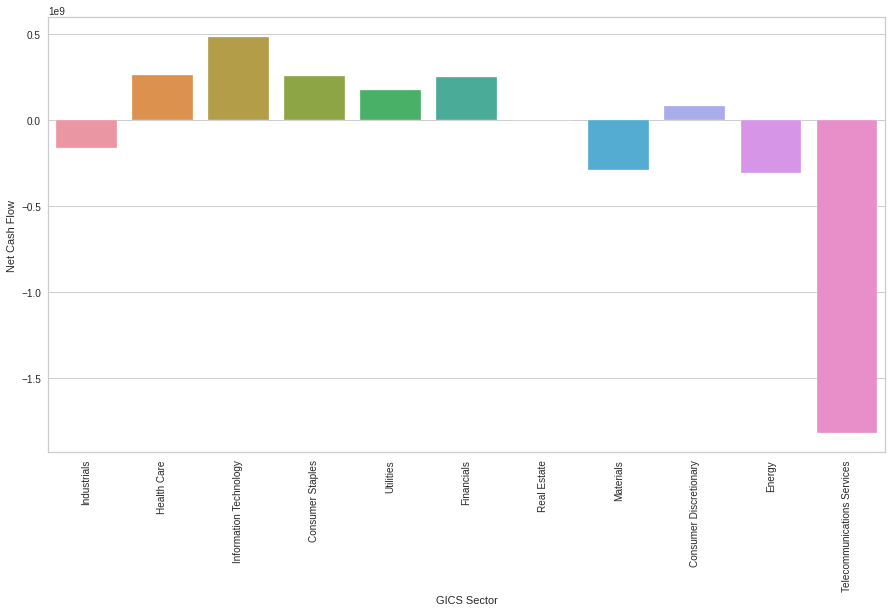

In [ ]:
# Barplot for average net cash flow among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Cash Flow', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- There are both positive and negative values foe net cash flow.
- Negative cash flow is when a business spends more money than it makes during a specific period.
- positive cash flow is when a business is left with cash even after spending for its operation.
- Telecommunications sector has highest negative net cash flow.
- Materials, Energy and Industrials also have negative net cash flow.
- Information technology sector has highest positive net cash flow.
- Health care, Consumer staples, Utilities, Financials, Consumer Discretionary also have positive cash ratio.


**Net Income is the  revenues minus expenses, interest, and taxes. Let us see how net income on average varies across different sectors**

In [ ]:
# Average Net Income among sectors
df['Net Income'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         1.373450e+09
Consumer Staples               2.518833e+09
Energy                        -2.087527e+09
Financials                     3.202678e+09
Health Care                    2.018515e+09
Industrials                    1.722373e+09
Information Technology         1.701587e+09
Materials                      2.785165e+08
Real Estate                    5.677757e+08
Telecommunications Services    7.067800e+09
Utilities                      1.107146e+09
Name: Net Income, dtype: float64

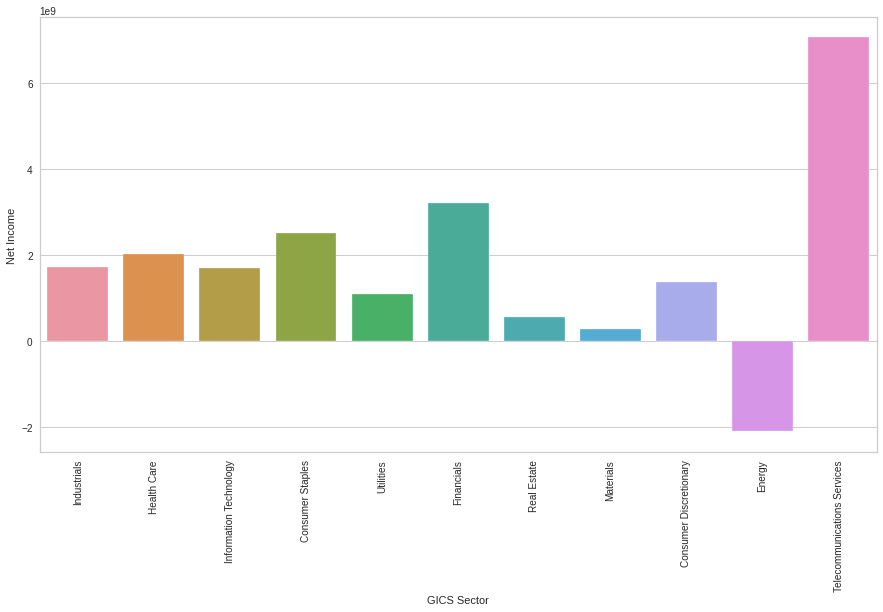

In [ ]:
# Barplot for average Net Income  flow among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Income', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Telecommunications Services sector has maximum net Income.
- Energy sector has negative Net Income.
- All other sectors have positive Net Income i.e on profit.


**Earnings per share is company's net profit divided by the number of common shares it has outstanding. Let us see how Earnings per share on average, varies across different sectors**

In [ ]:
# Average Earnings per share among sectors
df['Earnings Per Share'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         4.525750
Consumer Staples               3.224211
Energy                        -6.908333
Financials                     4.220408
Health Care                    4.541250
Industrials                    4.456792
Information Technology         2.266061
Materials                      3.129000
Real Estate                    2.340000
Telecommunications Services    3.550000
Utilities                      2.753125
Name: Earnings Per Share, dtype: float64

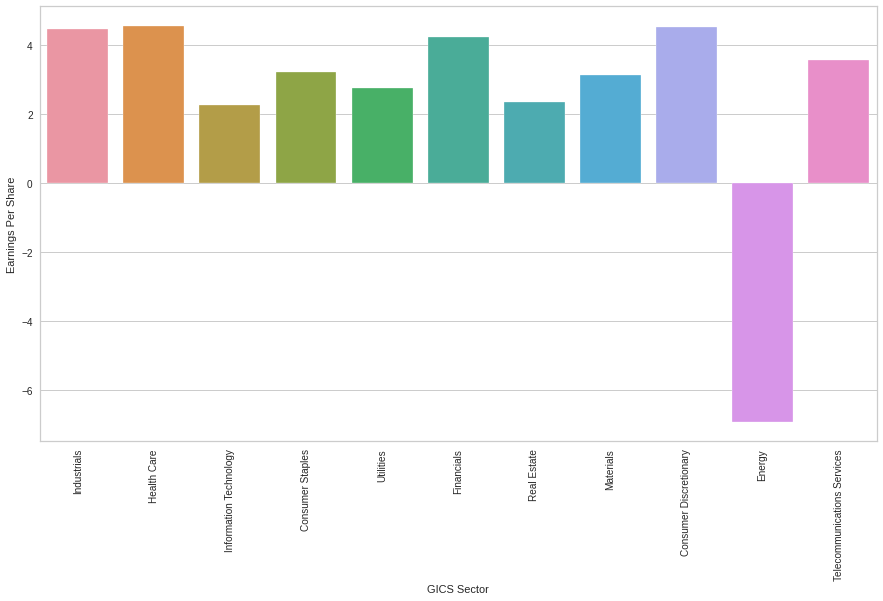

In [ ]:
# Barplot for average Earnings Per Share among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Energy sector has negative Earnings per share. It is obvious from net income that Energy sector on average is not generating profit.
- Industrials, Healthcare,Financials, Consumer Discretionary have average EPS around 4 to 4.5\$
- All other sectors have EPS ranging from 2 to 3\$


**Estimated shares outstanding is company's stock currently held by all its shareholders. Let us see how many shares on average held by shareholders in different sectors.**

In [ ]:
# Average Estimated Shares Outstanding among sectors
df['Estimated Shares Outstanding'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         3.996513e+08
Consumer Staples               9.136852e+08
Energy                         6.635288e+08
Financials                     6.838773e+08
Health Care                    6.845955e+08
Industrials                    3.547169e+08
Information Technology         8.282789e+08
Materials                      3.085246e+08
Real Estate                    3.444540e+08
Telecommunications Services    2.259575e+09
Utilities                      3.809193e+08
Name: Estimated Shares Outstanding, dtype: float64

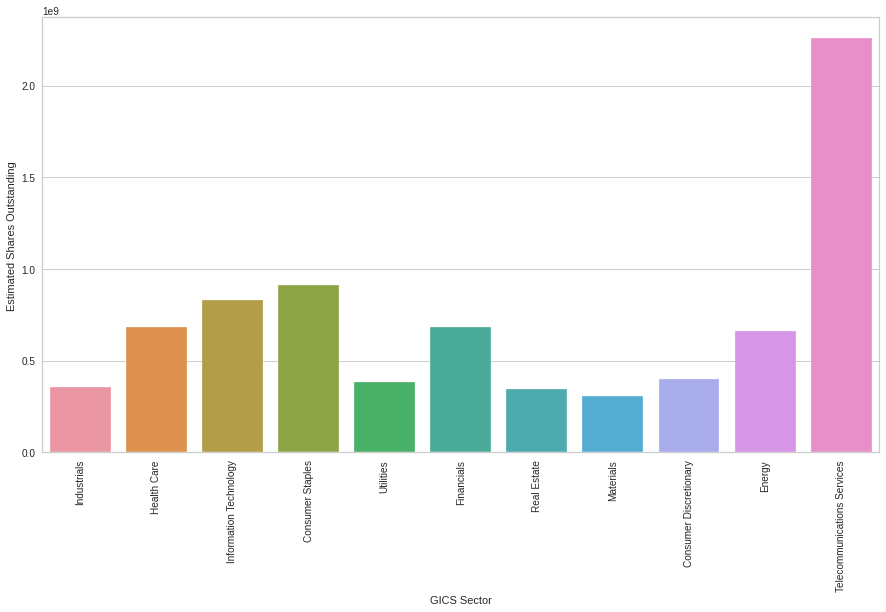

In [ ]:
# Barplot for average Estimated shares outstanding among sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Estimated Shares Outstanding', ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Telecommunications sector has maximum shares outstanding on average.
- Consumer Staples, Information technology, Health care sectors are next 3 top  sectors.
- Materials sector is the sector with minimum shares outstanding.


**P/E ratio is the ratio of the company's current stock price to the earnings per share. Let us look at P/E ratio on average across different sectors.**

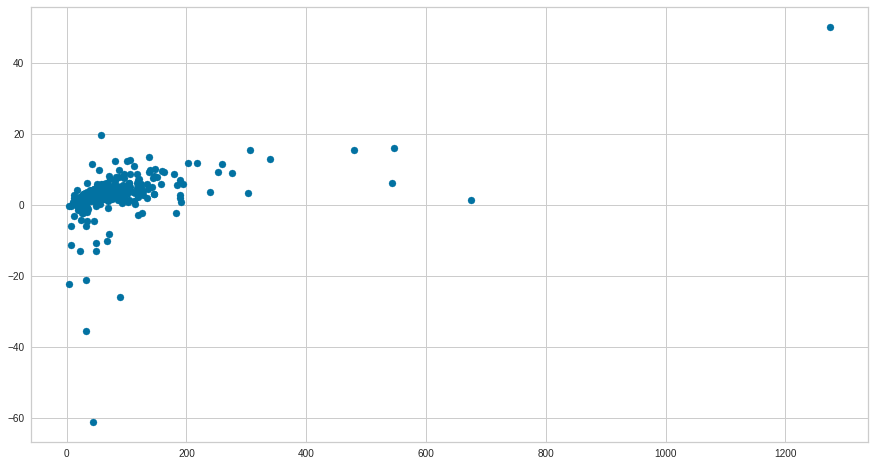

In [ ]:
#Scatterplot for Current price/Earnings per share i.e P/E ratio
plt.figure(figsize=(15,8))
plt.scatter(data=df,x='Current Price', y='Earnings Per Share')
plt.show()

#### Observations
- Stocks with current price upto 200\$ are generating \~ -60 to ~20\$
- Stocks within the range 200\$ to ~700\$ are generating positive P/E ratioupto ~20$
- The stocks above 1000\$ are generating maximum of ~50\$ P/E   

In [ ]:
# average P/E ratio of different sectors
df['P/E Ratio'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Energy                         72.897709
Financials                     16.023151
Health Care                    41.135272
Industrials                    18.259380
Information Technology         43.782546
Materials                      24.585352
Real Estate                    43.065585
Telecommunications Services    12.222578
Utilities                      18.719412
Name: P/E Ratio, dtype: float64

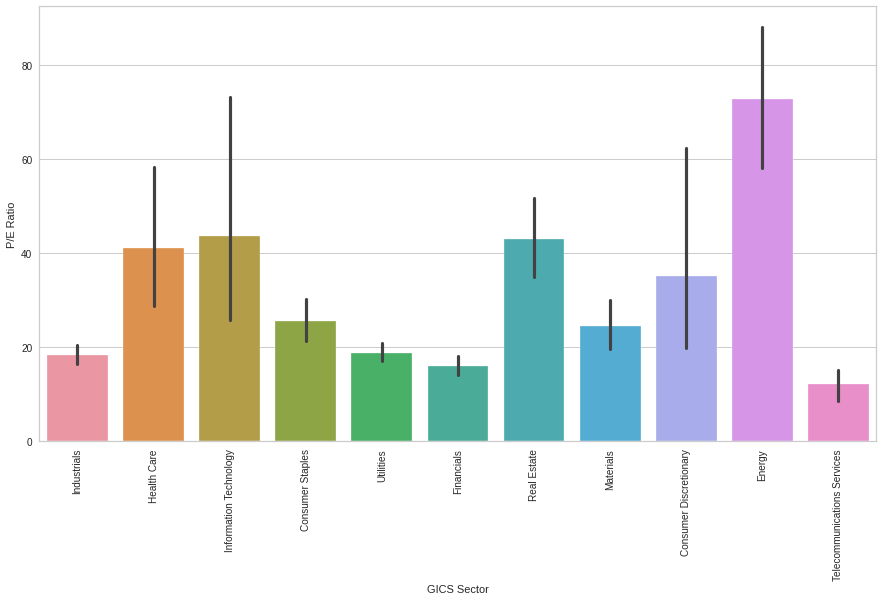

In [ ]:
# Barplot for average P/E ratio in different sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio')
plt.xticks(rotation=90)
plt.show()

#### Observations:
- It is not good idea to compare P/E ratio of different sectors.
- However we can see from the above plot that how P/E ratio varies within a sector.
- It looks like Information technology, Consumer Discretionary, Healthcare and Energy secotrs P/E ratio vary alot within the sector, on avearge.
- P/E ratio conveys how much investors will pay per share for $1 of earnings.
- It also indicates how a company is performing at present.
-  An investor interested in short selling might look for companies with high P/E ratios


**P/B Ratio is the ratio of company's stock price per share by its book value per share. Let us see how P/B ratio varies in different sectors.**

In [ ]:
# average P/B ratio of different sectors
df['P/B Ratio'].groupby(df['GICS Sector']).mean()

GICS Sector
Consumer Discretionary         -8.253543
Consumer Staples               -4.554003
Energy                          2.539738
Financials                     -4.270505
Health Care                     0.068869
Industrials                    -0.979266
Information Technology          6.377128
Materials                       0.723103
Real Estate                    -3.003320
Telecommunications Services   -11.009858
Utilities                      -3.087350
Name: P/B Ratio, dtype: float64

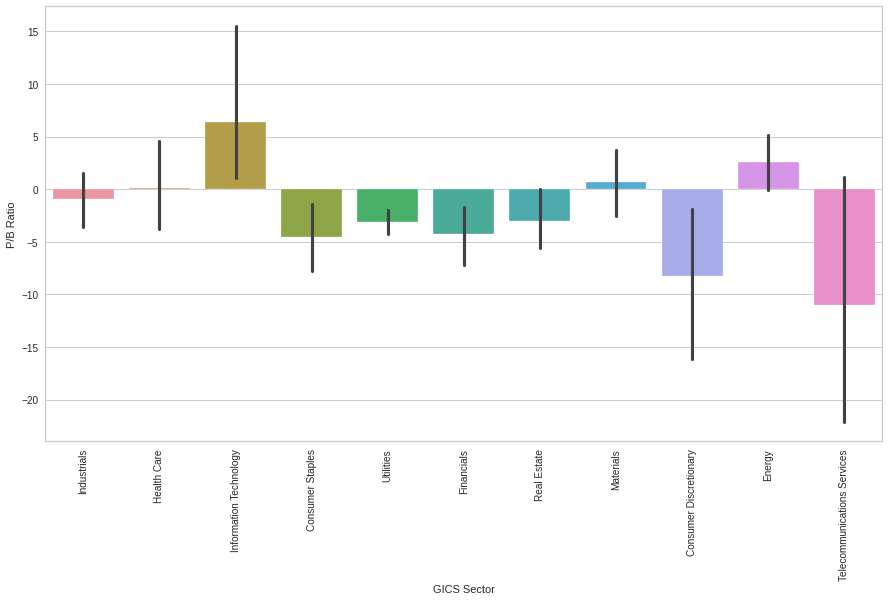

In [ ]:
# Barplot for average P/B ratio in different sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/B Ratio')
plt.xticks(rotation=90)
plt.show()

#### Observations:
- It is good to compare P/B ratio of companies in the same sector.
- Information Technology has varying form ~1 to ~15.
- Industrials,Health care,Materials,Energy and Telecommunications sector have both positive and negative P/B ratio.
- Consumer staples, Utilities, Financials,Consumer Discretionary have negative P/B ratio.
- As per the Market P/B ratio of less than or equal to 1 is good

### Outlier check

Let us check outliers for numerical variables

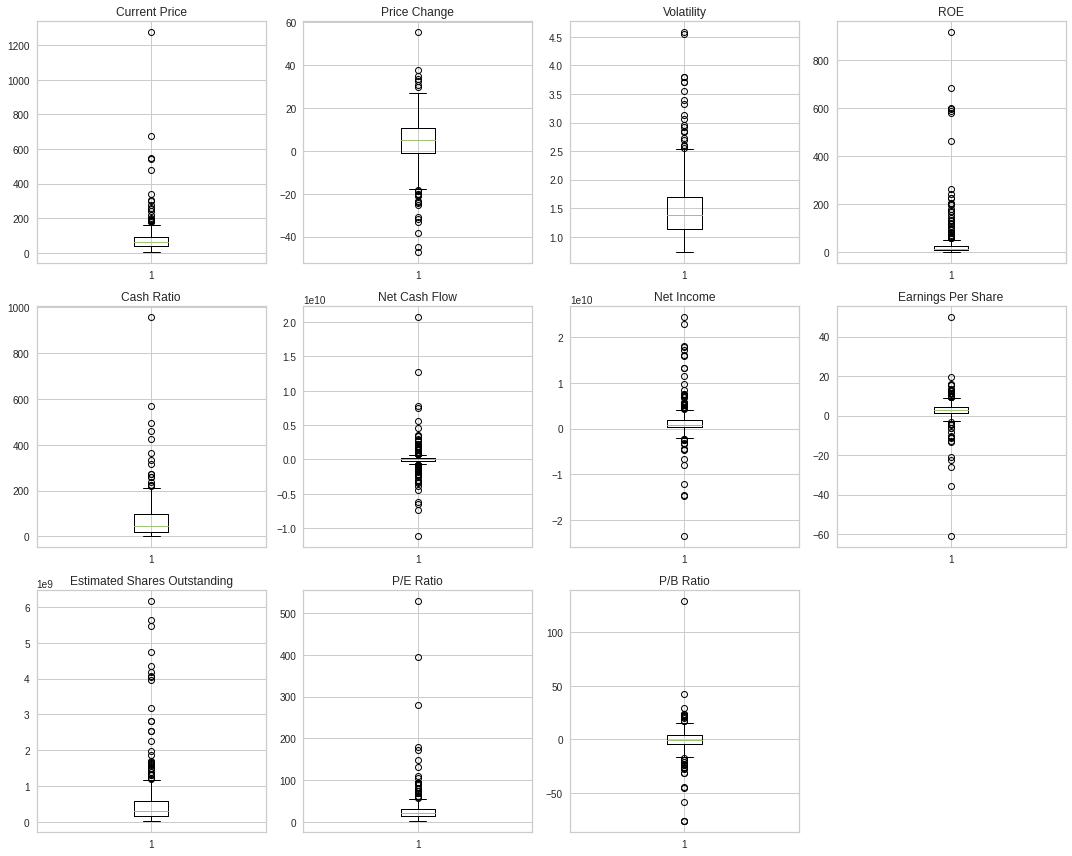

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- All of the numerical variables have outliers.
- Current price, Cash Ratio, Estimated share outstanding,Volatility, ROE, P/E Ratio have outliers at only upper end.
- All other variables have outliers at both the ends.
- These outliers seems to be natural part of the population.
- Current price has an outlier which is very distant from other outliers, i.e above 1200\$. Let us check how many records are above 1200\$ and drop them.
- Let us keep other outliers as it is.

**Dropping rows for which current price is more than 2000\$**

In [ ]:
df[df['Current Price'] > 1200]

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.949951,3.190527,1.26834,29,184,-1671386000,2551360000,50.09,50935516.07,25.453183,-1.052429


#### There is only one stock with Current price above 1200\$. Let us drop it

In [ ]:
df.drop(df[df['Current Price'] > 1200].index, inplace = True)


In [ ]:
df[df['Current Price'] > 1200]

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio


#### Let us check the outliers once again after outlier treatment

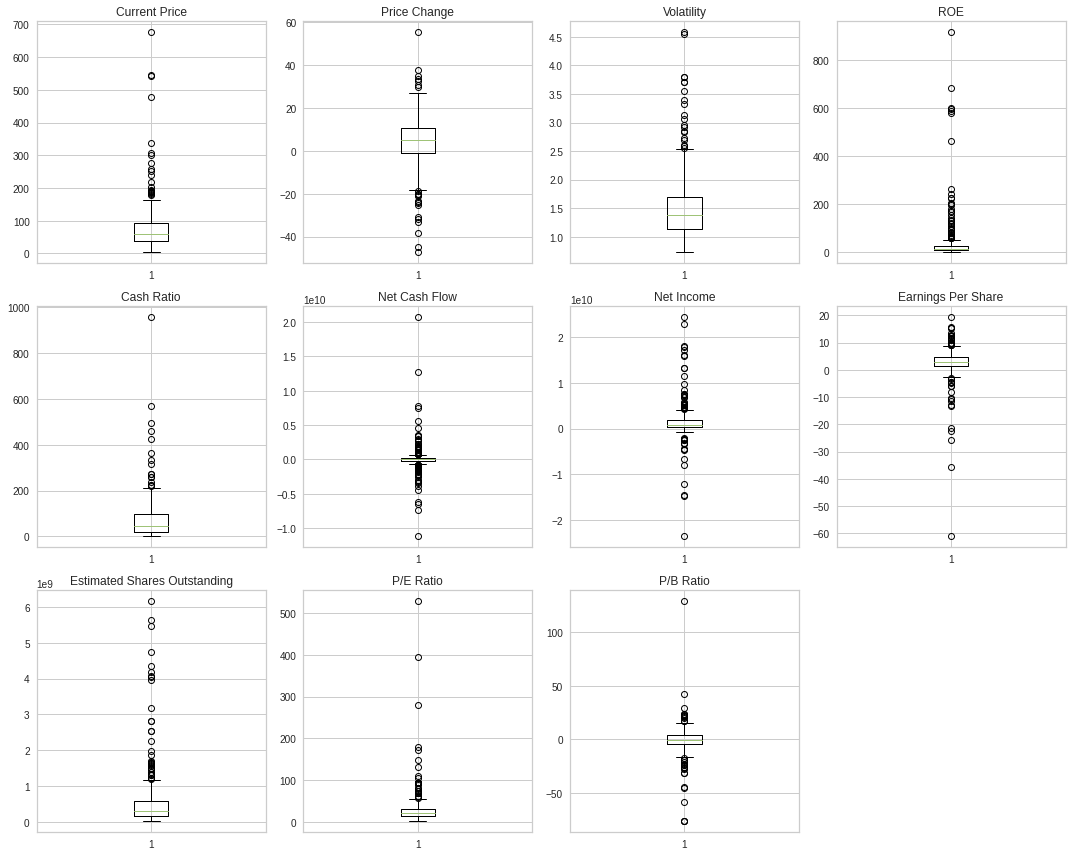

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Now there are no records with stock price above 1200\$

### Final Summary of the EDA after all preprocessing and outlier treatment

- There are 339 rows and 15 columns.
- There are 15 columns.4 are of object types, 7 are of floating point type,4 are of integer type.
- There are no missing values in the data.
- There are no duplicate values.
- Everey company has its own unique ticker symbol.
- There are 11 unique sectors.
- 104 Sub industries.

`Univariate analysis`:
- Distribution of Current price is skewed to the right.
- Price Change looks almost normally distributed.
- Volatility is right skewed.
- Distribution of ROE is right skewed.
- Cash ratio is right skewed.
- Histogram boxplot for Net Cash flow is shown in exponential form since they are very large numbers.In this Exponential form  Net cash flow looks almost normally distributed.
- Histogram boxplot for net income is plotted in exponential form of the values.Distribution of Net Income looks right skewed.
-Distribution looks almost normally distributed.
- Estimated shares outstanding is right skewed.
- Distribution of P/E is right skewed.
- P/B is almost normally distributed
- There are 104 Sub Industires.
- Oil and gas Exploration and production, RETs,Industrial Conglomerates are the top 3 sub industries.
- Industrials sector is the top sector, 53 of the companies in the data belongs to this sector.
- Oil and Gas Exploration & Production is the top sub-sector by having 16 companies belonging to this sector.
- Telecommunication Services is only 1.5% of the total services.

`Bivariate analysis `:
- None of the varibales are strongly correlated to each other.
- Net Income is somewhat positively correlated with Estimated shares outstanding and Earnings per share.
- Some of the variables appear to be almost normally distributed.
- Some are right skewed.
- Some are multimodal.

`Current Price`
- Distribution of current price of the stock looks right skewed along different sectors.
-  Highest price for a stock belongs to Consumer directory sector.
- Telecommunications and utilities have low range of values.
- Consumer Discretionary has a stock above 1200\$ which is the maximum stock price in our data, which is dropped from data.

`Price change`
- Health care sector have seen the maximum price increase on average.

`Cash Ratio`
 Average Cash ratio of Information Technology is 140, which the highest among all sectors.
- Telecommunications Services and health care sectors also have average cash ratio which is above 100.
- Utilities sector have lower end of cash ratio among different sectors.
- Real Estate, Consumer Discretionary and energy have almost similar cash ratio.

`Voaltility`
- Average volatility ranges from 1.1 to 2.5
- Energy sector shows maximum average volatility.

`ROE`
- Energy and Consumer staples are top 2 sectors with maximum ROE of ~93% and ~89% respectively.
- Utilities sector has minimum ROE of 9.87%.

`Net Cash Flow`
- Telecommunications sector has highest negative net cash flow.
- Materials, Energy and Industrials also have negative net cash flow.
- Information technology sector has highest positive net cash flow.

`Net Income`
- Telecommunications Services sector has maximum net Income.
- Energy sector has negative Net Income.

`Earnings per Share`
- Energy sector has negative Earnings per share. It is obvious from net income that Energy sector on average is not generating profit.
- Industrials, Healthcare,Financials, Consumer Discretionary have average EPS around 4 to 4.5\$
- All other sectors have EPS ranging from 2 to 3\$

`Estimated shares outstanding`
- Telecommunications sector has maximum number of estimated shares outstanding on average.
- Consumer Staples, Information technology, Health care sectors are next 3 top  sectors.
- Materials sector is the sector with minimum number of estimated shares outstanding.

`P/E ratio`
- It is not good idea to compare P/E ratio of different sectors.
- However we can see from the above plot that how P/E ratio varies within a sector.
- It looks like Information technology, Consumer Discretionary, Healthcare and Energy secotrs P/E ratio vary alot within the sector, on avearge.
- P/E ratio conveys how much investors will pay per share for $1 of earnings.

`P/B ratio`
- It is good to compare P/B ratio of companies in the same sector.
- Information Technology has varying form ~1 to ~15.
- Industrials,Health care,Materials,Energy and Telecommunications sector have both positive and negative P/B ratio.
- Consumer staples, Utilities, Financials,Consumer Discretionary have negative P/B ratio.




### Scaling
- As variables are of different metrics, let us scale the numeric data using Standard Scaler

In [ ]:
# Scaling the numeric variables
scaler=StandardScaler()
subset=df[numeric_columns].copy()
subset_scaled_array = scaler.fit_transform(subset)
subset_scaled=pd.DataFrame(subset_scaled_array, columns=subset.columns)

In [ ]:
subset_scaled

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.476314,0.493009,0.271139,0.987839,-0.207157,-0.341872,1.553084,1.443345,0.105930,-0.652028,-0.505769
1,-0.246392,0.354701,1.134405,0.936050,0.081064,-0.004954,0.927153,0.084578,1.247313,-0.311798,-0.503324
2,-0.441465,0.601380,-0.427783,-0.192948,-0.029790,0.451298,0.744146,0.049949,1.095197,-0.391417,0.094942
3,0.225974,0.824270,-0.285747,-0.317241,1.222863,-0.155070,-0.218725,-0.227081,-0.093376,0.945314,0.423851
4,-0.299755,-0.492133,0.294833,-0.265452,2.242722,0.130903,-0.201635,-0.383736,1.974783,3.288111,0.199044
...,...,...,...,...,...,...,...,...,...,...,...
334,-0.600055,0.900108,0.538193,-0.255095,4.315696,-0.562121,-1.484962,-1.199986,0.426889,-0.082474,0.571495
335,-0.337923,-1.064424,-0.080893,1.060343,-0.473207,0.050598,-0.050325,0.054896,-0.169426,-0.337147,-0.151648
336,0.343725,0.438678,-0.207106,-0.400103,0.336029,0.162218,-0.341208,-0.306233,-0.461479,2.229957,-1.586916
337,-0.681187,-0.436390,-0.098981,-0.369030,0.324944,-0.053626,-0.299969,-0.236975,-0.379348,-0.222871,0.118646


## K-means Clustering

In [ ]:
k_means_df = subset_scaled.copy()

Number of Clusters: 1 	Average Distortion: 2.57605777998219
Number of Clusters: 2 	Average Distortion: 2.4137744333273585
Number of Clusters: 3 	Average Distortion: 2.29733478331506
Number of Clusters: 4 	Average Distortion: 2.2094526662326848
Number of Clusters: 5 	Average Distortion: 2.164037928206288
Number of Clusters: 6 	Average Distortion: 2.0789923937841808
Number of Clusters: 7 	Average Distortion: 2.0689371344627725
Number of Clusters: 8 	Average Distortion: 2.0087436963458147
Number of Clusters: 9 	Average Distortion: 1.9391206203029197
Number of Clusters: 10 	Average Distortion: 1.88270497272597
Number of Clusters: 11 	Average Distortion: 1.8616945002754608
Number of Clusters: 12 	Average Distortion: 1.7708227389158164
Number of Clusters: 13 	Average Distortion: 1.7492071737780082
Number of Clusters: 14 	Average Distortion: 1.6939759394791511


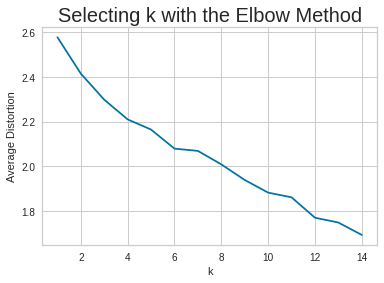

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

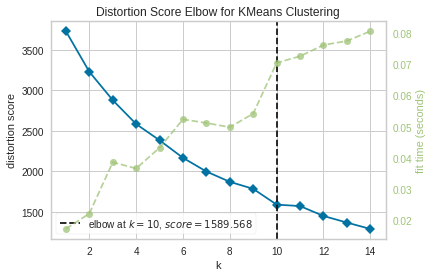

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Silhouette score

For n_clusters = 2, the silhouette score is 0.4423462789252391)
For n_clusters = 3, the silhouette score is 0.45620195429824606)
For n_clusters = 4, the silhouette score is 0.4479429846517166)
For n_clusters = 5, the silhouette score is 0.4070251837243116)
For n_clusters = 6, the silhouette score is 0.409479466063773)
For n_clusters = 7, the silhouette score is 0.4001783256510047)
For n_clusters = 8, the silhouette score is 0.42063957557779663)
For n_clusters = 9, the silhouette score is 0.24571656377934398)
For n_clusters = 10, the silhouette score is 0.21739025447022067)
For n_clusters = 11, the silhouette score is 0.19664798976159048)
For n_clusters = 12, the silhouette score is 0.13064299983930042)
For n_clusters = 13, the silhouette score is 0.14283723914606705)
For n_clusters = 14, the silhouette score is 0.1552678097496363)


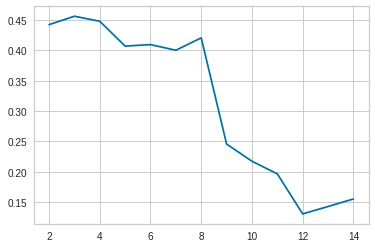

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

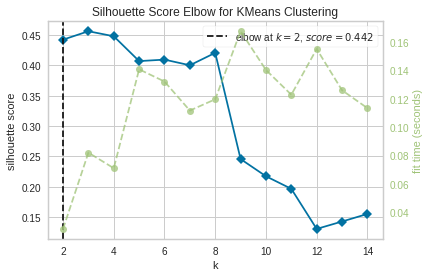

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

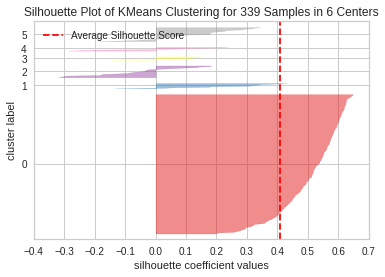

In [ ]:
 #finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

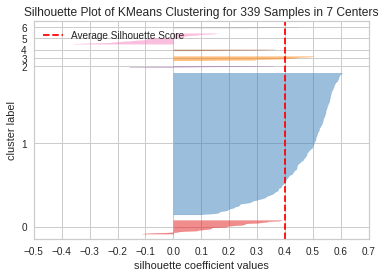

In [ ]:
 #finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

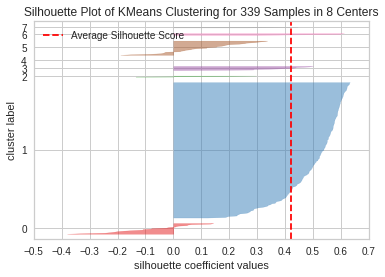

In [ ]:
 #finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

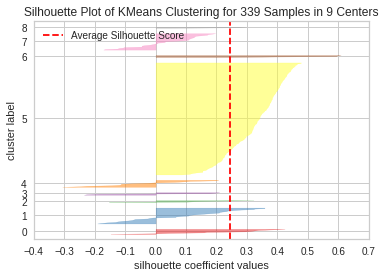

In [ ]:
 #finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

#### Let us select 8 as appropriate cluster since it has good silhouette score as well as good distortion

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Company"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,194.614697,15.222408,1.745347,30.590909,287.272727,480820636.363636,998676090.909091,5.075909,503211154.986818,49.128658,15.822754,22
1,71.160504,4.981264,1.379902,25.190299,53.768657,4304746.268657,1577066089.552239,3.691325,440465803.075187,23.441800,-3.198796,268
2,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,675.890015,32.268105,1.460386,4.000000,58.000000,1333000000.000000,596000000.000000,1.280000,465625000.000000,528.039074,3.904430,1
5,37.793063,-13.766418,2.752253,38.482759,60.172414,154939689.655172,-1772209689.655172,-4.631724,575707928.022069,90.165571,1.918331,29
6,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
7,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Company"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Cor

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Company'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          4
             Consumer Staples                1
             Health Care                    10
             Information Technology          5
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    29
             Industrials                    50
             Information Technology         23
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Energy                          3
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy

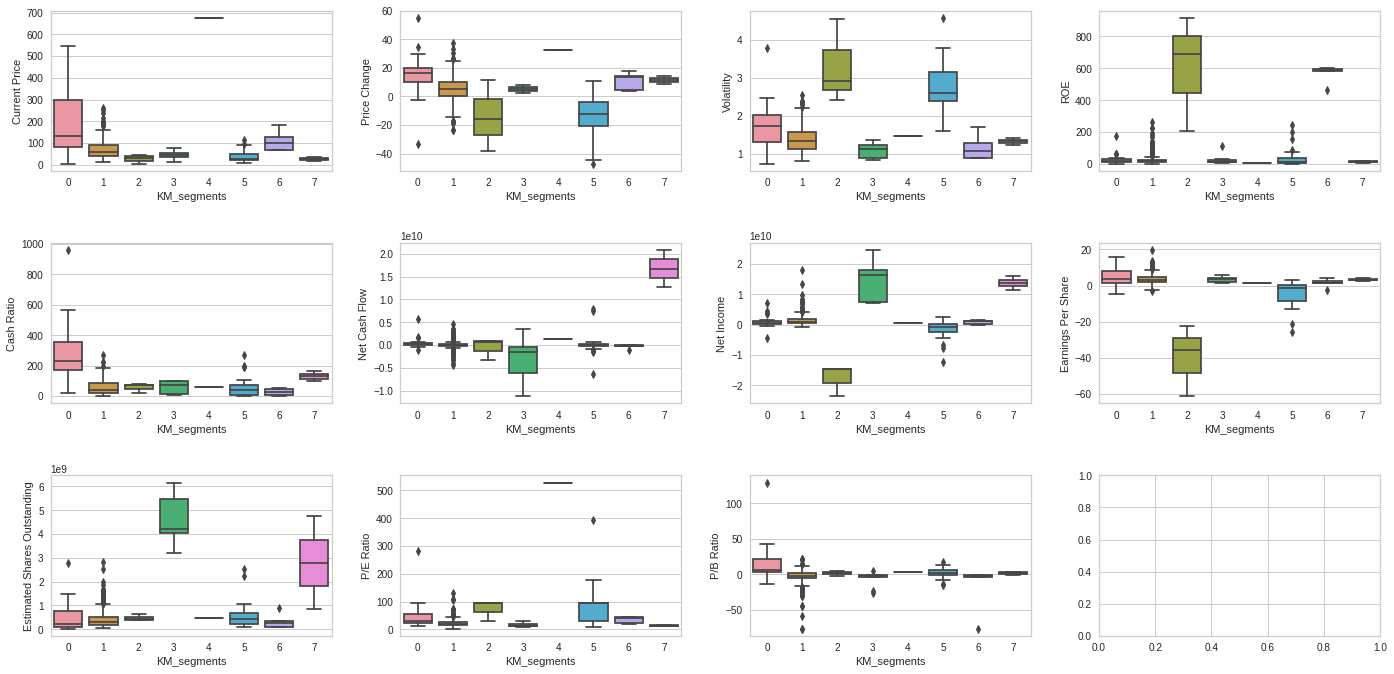

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

`Cluster 0`:
Current price has good range of prices. 50% of the stocks here are ranging upto 300\$. They have good price increase upto ~60%. Medium volatile.Low ROE. Medium Cash ratio, low range of net cash flow and net Income. Good range of earnings per share. Low range of estimated outstanding shares. Low P/E and P/B ratio.

`Cluster 1`:
This cluster is almost similar to cluster 0. Current price has lower range and Net Income greater than of cluster 0 stocks.

`Cluster 2`:
low range price, wide range of price change,50% of the companies in this cluster have price change in between ~-15% to 0%., highly volatile,high ROE, low cash ratio, low Net cash flow,low net income, negative Earnings per share, low range of Estimated shares outstanding, low P/E,low P/B

`Cluster 3`:
low range of current price, lower range of increased price change,low volatile,lower range of ROE,low cash ratio, wide range of net cash flow,most of them are negative net cash flow. High range of net Income, good Earnings per share, More number of outstanding shares, Low P/E and P/B ratio

`Cluster 4`:High range current price,very good increase in price change,low volatile,low ROE,low range of outstanding stocks. High P/E ratio,low P/B ratio

`Cluster 5`:
Low price range, wide range of price change. 50% of companies have negative price change, Moderate to high volatile, low ROE. low range cash ratio,both positive and negative net cash flow and net Income. 50% of the companies have negative earnings per share. Low to medium range shares outstanding.Good range of P/E ratio and low range of P/B ratio

`Cluster 6`:
50% of the stocks have current price in between 50\$ to 150\$.
Good increase in price change.Low volatile, High ROE. Low cash Ratio,low net Cash flow and net income.Lower range of positive earnings per share. Low P/E and P/B ratio.

`Cluster 7`:
High Net cash flow,High net Income, Wide range of estimated stocks outstanding.


# Hierarchical Clustering

In [ ]:
#copying scaled subset of data
hc_df = subset_scaled.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.920206139844965.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7130278024498963.
Cophenetic correlation for Euclidean distance and average linkage is 0.9353840505509494.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7889463873737064.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9038982634662251.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8077139264860221.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9307482833475694.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9066369434563016.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9218351818591475.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8305893240305312.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9329821864946938.
Cophenetic cor

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.920206139844965.
Cophenetic correlation for complete linkage is 0.7130278024498963.
Cophenetic correlation for average linkage is 0.9353840505509494.
Cophenetic correlation for centroid linkage is 0.9444240454011564.
Cophenetic correlation for ward linkage is 0.7070477498776296.
Cophenetic correlation for weighted linkage is 0.7889463873737064.
****************************************************************************************************
Highest cophenetic correlation is 0.9444240454011564, which is obtained with centroid linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

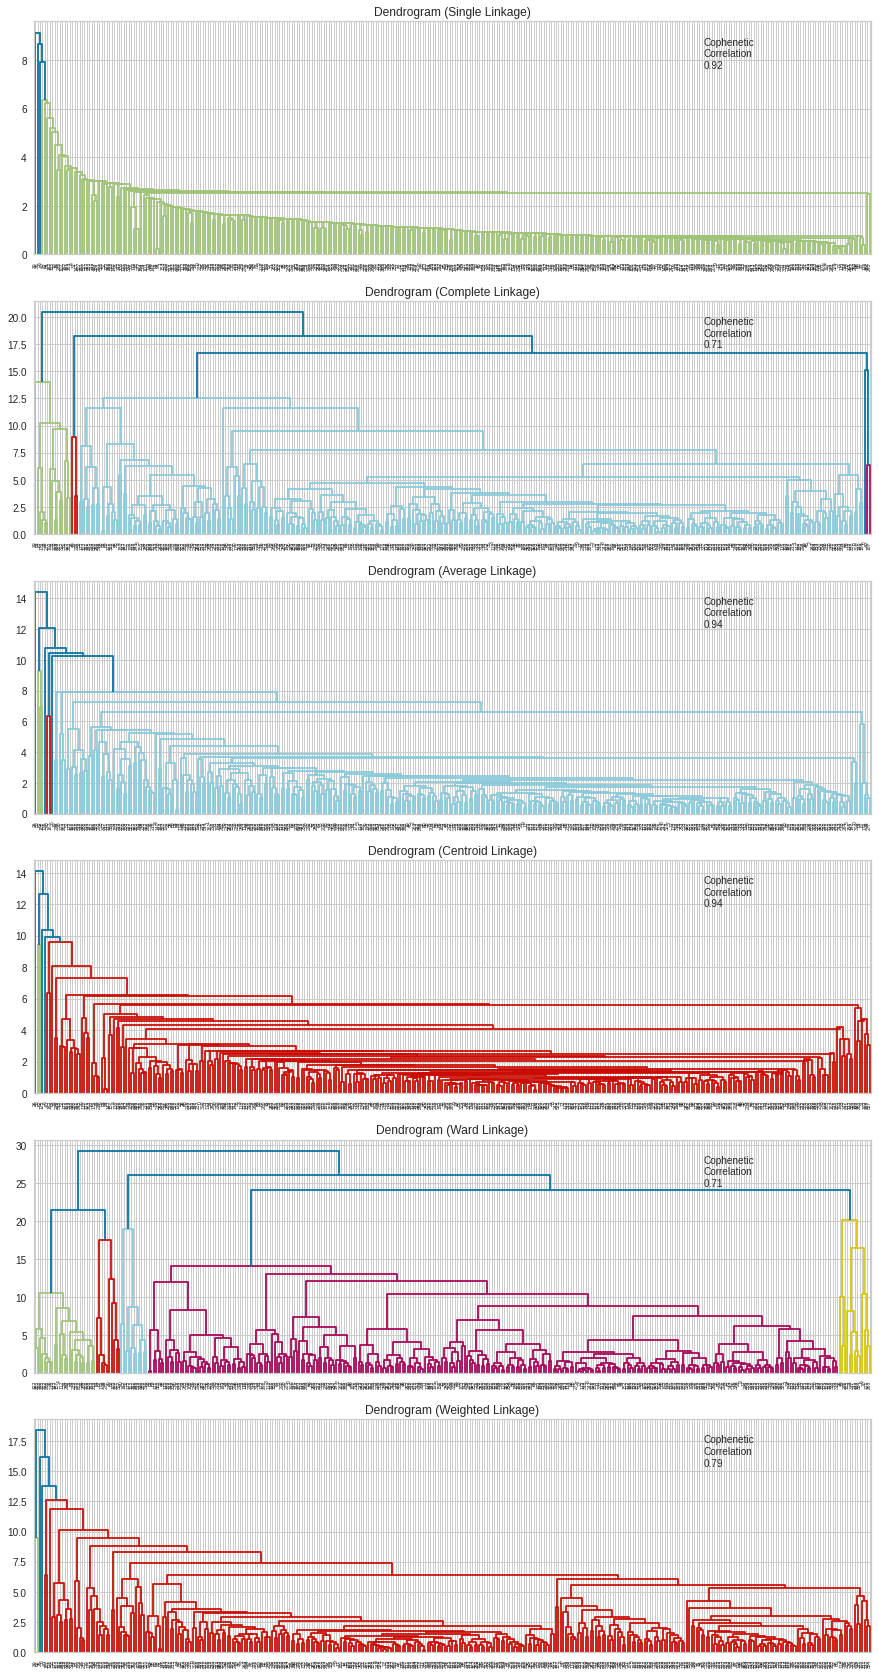

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.707048
1,complete,0.713028
5,weighted,0.788946
0,single,0.920206
2,average,0.935384
3,centroid,0.944424


#### Observations:
- Cohenetic Coefficient for single,average and centroid linkage methods are highest.
- We will build clusters with average linkage.
- 7  appears to be the appropriate number of clusters from the dendrogram for average linkage.


In [ ]:
# Agglomerative clustering model with euclidian distance and average distance
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Company"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,75.615943,4.073776,1.513994,34.918429,66.918429,-39932652.567976,1589235238.670695,3.006239,561256707.372357,30.761208,-2.205253,331
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,18.250000,-26.789934,3.741756,446.000000,46.000000,-1226500000.000000,-14569500000.000000,-28.990000,530642900.300000,60.748608,-0.027456,2
3,675.890015,32.268105,1.460386,4.000000,58.000000,1333000000.000000,596000000.000000,1.280000,465625000.000000,528.039074,3.904430,1
4,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-My

#### Observations:
- We see that there are 4 clusters with 1 company ,2 clusters with 2 companies and 1 cluster with 331 companies.

- This clustering does not look good as the clusters do not have enough variability.

Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 8 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [ ]:
# Hierarchical clustering
HCmodel = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=8)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Company"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,233.460332,7.948632,1.597272,16.800000,397.600000,229150300.000000,936570300.000000,6.119000,696450208.217000,37.496312,28.029510,10
1,37.666897,-16.208373,2.748889,69.448276,72.827586,94868827.586207,-2777111724.137931,-6.574138,555255639.242759,80.967619,2.075678,29
2,74.117728,5.621922,1.411396,25.864286,57.925000,28455557.142857,1553555003.571429,3.704054,439895414.360679,23.934211,-2.765065,280
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
7,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Company"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International C

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Company'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Telecommunications Services     1
1            Energy                         23
             Information Technology          5
             Materials                       1
2            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         23
             Materials                      19
             Real Estate                    27
             Telecommunications Services     2
             Utilities                      24
3            Consumer Discretionary          1
             Consum

#### Observation:
- Now the clusters have variability.

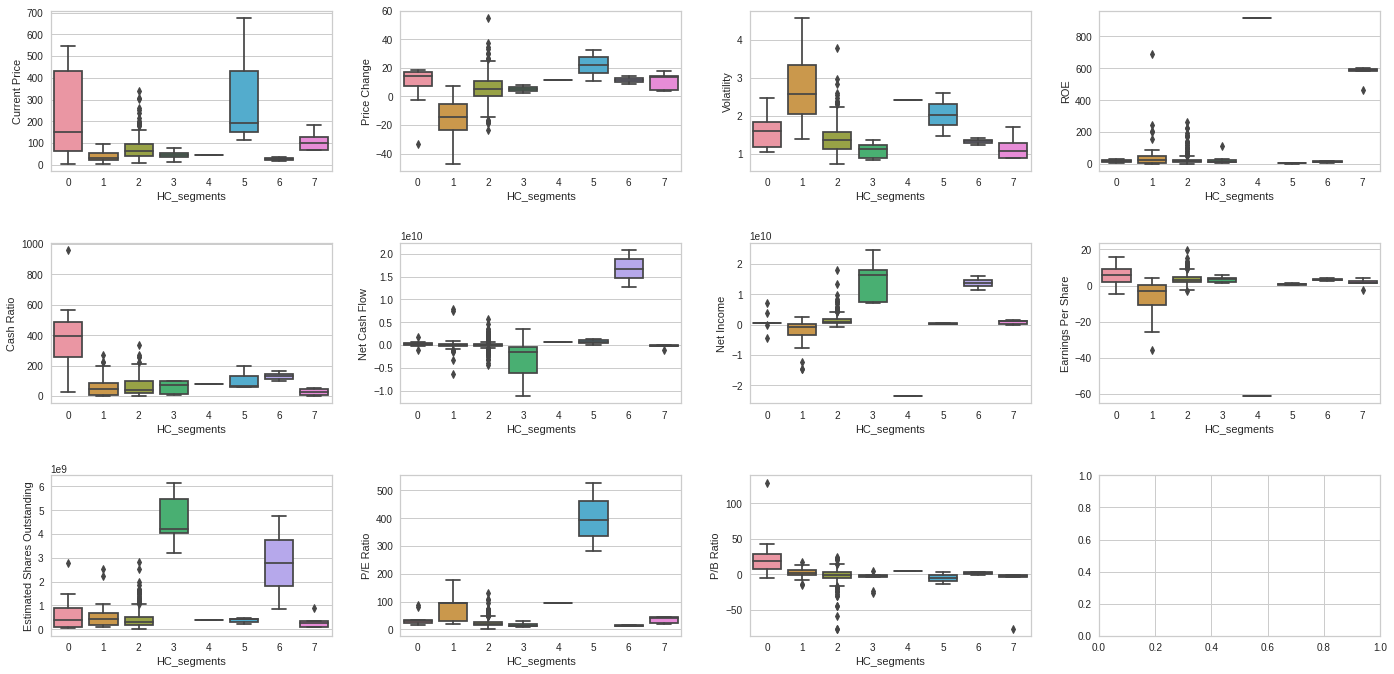

In [ ]:
# Boxplot for numerical variables of each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## K-means vs Hierarchical Clustering

- Both K-means and Hierarchical clustering techniques took same time for execution since the data set is small. If we had larger dataset we could have seen difference in execution time.
- Both K-means and Hierarchical clusters have 8 clusters.
- K- means has more variablity in clusters compared to Hierarchical clustering.
- Largest cluster in K-means has 268 objects and Hierarchical has 280 clusters. They have almost similar objects.
- Cluster 3 are almost similar.
- Second largest cluster of both have 29 objects in it.
- Both have cluster with one object.


## Actionable Insights & Recommendations

- We can see different clusters with different characteristics.
- Cluster 0 of K-means and Hierarchical are having good cash ratio, Earnings per share and P/B ratio. These companies have potential growth in future. If we need to invest in growth companies we can buy shres from these cluster.
- Cluster 3 of K-means and Cluster 1 of Hierarchical are Highly have volatile stocks. If we are ready to take risk and try the luck we can buy from these clusters. This is good for day trading. Not Long term investment.
- Cluster 1 of k means and Cluster 2 of Hierarchical have average stocks.
- Cluster 4 of K-means have good percentage of change in price. P/E ratio also very good. These are the companies that are doing well at present. It does not guarantee for future investment.
- Cluster 7 of K-means or Cluster 6 of hierarchical looks good for long term investors.
- Cluster 3 have some value stocks that are good for any marketing conditions.
- Consumer Discretionary, Information Technology and Financial sectors appears to be good investment sectors.
- Energy sector looks volatile.
- It is good to have combination of short term and long term investment.
- Good amount should be reserved for long term and investing in value stocks is better to avoid any posssible losses due to market conditions.
